In [1]:
import os
import sys
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('E:/features_split.csv')

In [3]:
features = ['power', 'peak', 'p2p', 'crest_factor', 'skew', 'kurtosis', 'form_factor', 'pulse_indicator']

subscript = ['_f1', '_f2', '_f3', '_f4', '_f5', '_f6', '_f7', '_f8',
             '_f9', '_f10', '_f11', '_f12', '_f13', '_f14', '_f15', '_f16',
             '_w1', '_w2', '_w3', '_w4', '_w5', '_w6',
             '_w7', '_w8','_w9', '_w10', '_w11', '_w12']

In [4]:
cols = ['session', 'participant', 'gesture']
for feat in features:
    for sub in subscript:
        cols.append(str(feat + sub))

In [5]:
df_multiplevalues = df[cols]

In [6]:
grouped = df_multiplevalues.groupby(df_multiplevalues.session)
df_mvsession1 = grouped.get_group(1)
df_mvsession2 = grouped.get_group(2)
df_mvsession3 = grouped.get_group(3)

In [7]:
df_multiplevalues

session  participant  gesture  power_f1  power_f2  power_f3  power_f4  \
0            1            1       10  0.002297  0.004143  0.005987  0.005563   
1            1            1       10  0.003276  0.005005  0.008011  0.008681   
2            1            1       10  0.001570  0.002424  0.003572  0.005336   
3            1            1       10  0.004655  0.006518  0.010580  0.015255   
4            1            1       10  0.003665  0.005650  0.008234  0.010806   
...        ...          ...      ...       ...       ...       ...       ...   
15346        3            9        9  0.001265  0.000794  0.000769  0.000625   
15347        3            9        9  0.002672  0.002797  0.002296  0.001296   
15348        3            9        9  0.002550  0.002242  0.002246  0.001519   
15349        3            9        9  0.001746  0.001153  0.001107  0.001156   
15350        3            9        9  0.001881  0.002216  0.002075  0.001161   

       power_f5  power_f6  power_f7  ...  pulse_indicator_w3  \
0      0.006117  0.005708  0.002777  ...       -24766.449420   
1      0.006212  0.003992  0.003027  ...         4399.169057   
2      0.003980  0.002588  0.001379  ...         6703.634237   
3      0.012973  0.011920  0.004474  ...       -12527.600250   
4      0.013338  0.011643  0.003606  ...        -3823.957702   
...         ...       ...       ...  ...                 ...   
15346  0.000624  0.000874  0.001839  ...       -25913.642380   
15347  0.001222  0.002126  0.003691  ...         5871.978993   
15348  0.001482  0.002802  0.005038  ...        -2317.581660   
15349  0.001348  0.002518  0.004105  ...         4858.367244   
15350  0.001144  0.002688  0.005945  ...        36251.954020   

       pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
0            55998.925740       -87026.701300       -22409.615340   
1             3718.373920         5797.876858        37126.467620   
2             5369.174238       180687.504600       384499.643200   
3           -18859.597320       444990.439000       -25365.796330   
4            -3951.148620       243025.759200        28044.243160   
...                   ...                 ...                 ...   
15346       -50737.294740         6291.917153        13933.047410   
15347         5091.681331        15004.353910         4480.531639   
15348        -1693.503578        -1668.344394        -1961.128730   
15349      -111539.365600       -10462.491200       123147.488300   
15350       -21945.074850        -3799.843738       -10250.664910   

       pulse_indicator_w7  pulse_indicator_w8  pulse_indicator_w9  \
0           -56036.519770       -29715.846110       -22508.900330   
1           103951.349000        41910.484010        19538.524400   
2            11840.020980         4555.167360         6689.192584   
3            -7536.744295        -7014.568871        -6231.068129   
4            -6390.244838        -4207.297608        -2707.517895   
...                   ...                 ...                 ...   
15346        -9340.493895        48330.182020       -32120.566650   
15347        11488.098710        17179.011640         9402.224678   
15348        -3067.153722        -7370.149527        -2292.096061   
15349         3702.991351         6687.996647         4214.645767   
15350        48789.481130         8552.141143        14955.134800   

       pulse_indicator_w10  pulse_indicator_w11  pulse_indicator_w12  
0             33006.620180       -121989.795600        -17437.765630  
1              3345.752726          5849.280470        -10499.288830  
2              3224.272111        402075.465600        -19706.586100  
3             18245.894390        178349.576200       -107645.155600  
4             -3011.715296        280416.878800         10586.039620  
...                    ...                  ...                  ...  
15346        -24182.610170         28821.208580          9895.211205  
15347        -67007.493730         35502.801650    

In [8]:
df_mvsession1

session  participant  gesture  power_f1  power_f2  power_f3  power_f4  \
0           1            1       10  0.002297  0.004143  0.005987  0.005563   
1           1            1       10  0.003276  0.005005  0.008011  0.008681   
2           1            1       10  0.001570  0.002424  0.003572  0.005336   
3           1            1       10  0.004655  0.006518  0.010580  0.015255   
4           1            1       10  0.003665  0.005650  0.008234  0.010806   
...       ...          ...      ...       ...       ...       ...       ...   
5112        1            9        9  0.004260  0.002340  0.002108  0.001945   
5113        1            9        9  0.001415  0.000752  0.000684  0.000519   
5114        1            9        9  0.001722  0.001809  0.001686  0.002135   
5115        1            9        9  0.004080  0.002077  0.001399  0.001230   
5116        1            9        9  0.001612  0.000813  0.000652  0.000793   

      power_f5  power_f6  power_f7  ...  pulse_indicator_w3  \
0     0.006117  0.005708  0.002777  ...       -2.476645e+04   
1     0.006212  0.003992  0.003027  ...        4.399169e+03   
2     0.003980  0.002588  0.001379  ...        6.703634e+03   
3     0.012973  0.011920  0.004474  ...       -1.252760e+04   
4     0.013338  0.011643  0.003606  ...       -3.823958e+03   
...        ...       ...       ...  ...                 ...   
5112  0.001394  0.001534  0.002084  ...       -3.763675e+06   
5113  0.000571  0.001071  0.001419  ...       -6.073546e+03   
5114  0.001596  0.001893  0.002474  ...        3.272319e+04   
5115  0.000945  0.001591  0.002665  ...       -2.363118e+03   
5116  0.000747  0.001456  0.002597  ...       -1.481247e+04   

      pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
0           55998.925740       -87026.701300       -22409.615340   
1            3718.373920         5797.876858        37126.467620   
2            5369.174238       180687.504600       384499.643200   
3          -18859.597320       444990.439000       -25365.796330   
4           -3951.148620       243025.759200        28044.243160   
...                  ...                 ...                 ...   
5112       -22864.930810       245199.006600        13614.830400   
5113       -11230.209930        15164.086790        -9173.868735   
5114       305029.426400        -6136.969741        16392.294030   
5115        -1920.288014        -7630.308893       -23310.707180   
5116       -13175.870660        -4971.417567       -29237.991540   

      pulse_indicator_w7  pulse_indicator_w8  pulse_indicator_w9  \
0          -56036.519770       -2.971585e+04       -22508.900330   
1          103951.349000        4.191048e+04        19538.524400   
2           11840.020980        4.555167e+03         6689.192584   
3           -7536.744295       -7.014569e+03        -6231.068129   
4           -6390.244838       -4.207298e+03        -2707.517895   
...                  ...                 ...                 ...   
5112        13389.791170       -1.439586e+06      -635223.745600   
5113        -6281.430557       -2.492200e+04        -6180.533971   
5114       -21972.413300        1.622386e+04        27305.294200   
5115        11639.988270       -2.507865e+04        -2342.923183   
5116      -944274.285700       -5.489827e+04       -16895.125220   

      pulse_indicator_w10  pulse_indicator_w11  pulse_indicator_w12  
0            33006.620180       -121989.795600        -17437.765630  
1             3345.752726          5849.280470        -10499.288830  
2             3224.272111        402075.465600        -19706.586100  
3            18245.894390        178349.576200       -107645.155600  
4            -3011.715296        280416.878800         10586.039620  
...                   ...                  ...                  ...  
5112        -23287.993360       -156348.804400          4654.568075  
5113         -9026.834529         21410.492900        -36247.884900  
5114       -383927.887300         -4

In [9]:
df_mvsession2

session  participant  gesture  power_f1  power_f2  power_f3  power_f4  \
5117         2            1       10  0.004253  0.005853  0.008044  0.010733   
5118         2            1       10  0.004596  0.006116  0.008719  0.012473   
5119         2            1       10  0.003985  0.005408  0.007329  0.009516   
5120         2            1       10  0.004851  0.007251  0.009620  0.011351   
5121         2            1       10  0.002479  0.003383  0.004266  0.005693   
...        ...          ...      ...       ...       ...       ...       ...   
10229        2            9        9  0.001490  0.003386  0.002055  0.001724   
10230        2            9        9  0.001220  0.001079  0.000945  0.000748   
10231        2            9        9  0.001319  0.001459  0.001109  0.000863   
10232        2            9        9  0.003483  0.002510  0.002085  0.001612   
10233        2            9        9  0.001885  0.001370  0.001569  0.001455   

       power_f5  power_f6  power_f7  ...  pulse_indicator_w3  \
5117   0.012589  0.013966  0.005340  ...        75235.338710   
5118   0.013663  0.013199  0.005338  ...         3045.311060   
5119   0.010996  0.011056  0.004515  ...       104083.966100   
5120   0.013813  0.013526  0.005716  ...        40873.154180   
5121   0.009775  0.011598  0.003515  ...        -3375.280500   
...         ...       ...       ...  ...                 ...   
10229  0.001520  0.002540  0.001096  ...       -34432.870040   
10230  0.001080  0.003921  0.001228  ...         5405.785418   
10231  0.001094  0.004370  0.000980  ...         3964.091199   
10232  0.001261  0.002973  0.000878  ...       -21944.068120   
10233  0.001664  0.007467  0.001230  ...        28121.035940   

       pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
5117         11499.612050       -82873.371770       -36603.443520   
5118          4228.632601         2641.653129         6249.637549   
5119         12475.510710        -5848.612225        -5067.279830   
5120        -39891.355300        29928.050540        15681.541520   
5121         -4538.661479        -9190.557336         8233.025318   
...                   ...                 ...                 ...   
10229        17304.455280         6360.610205        17940.473450   
10230        41768.753600         4255.741914         7418.446095   
10231       -90168.507900         3258.581759        17674.994600   
10232      -244717.989900        31897.061050        11963.882460   
10233        -6756.734133         5586.791446        24660.290770   

       pulse_indicator_w7  pulse_indicator_w8  pulse_indicator_w9  \
5117        -11713.667960       -12023.957570       -32599.788400   
5118          4547.234526         2187.535703         2642.608907   
5119         71534.859320         8230.562873      -599436.557700   
5120          6893.461425        10815.528610        52944.558220   
5121        -13512.545770        -2830.601972        -3075.941273   
...                   ...                 ...                 ...   
10229        30259.766380       -10749.414680       -30903.929960   
10230         5449.854163         3808.654536         4452.731678   
10231         2709.183621         3561.928182         3524.290529   
10232        50146.335060        26508.323890       -32613.241630   
10233         5769.033617         6289.007394        11213.481440   

       pulse_indicator_w10  pulse_indicator_w11  pulse_indicator_w12  
5117          12954.650810        -41128.091850        -24040.113590  
5118          21176.547350          5870.302387        -85946.993400  
5119         -12480.744010         -3829.584330         -4233.890897  
5120         -32590.968220        287278.169600         20626.346980  
5121          -9091.207839        112510.714500          4387.063399  
...                    ...                  ...                  ...  
10229          8932.760226          8264.277723         10123.482760  
10230         -7766.380368         10305.441350    

In [10]:
df_mvsession3

session  participant  gesture  power_f1  power_f2  power_f3  power_f4  \
10234        3            1       10  0.001542  0.002369  0.002964  0.004144   
10235        3            1       10  0.001146  0.002451  0.002713  0.002803   
10236        3            1       10  0.002066  0.002320  0.003012  0.003817   
10237        3            1       10  0.001156  0.002192  0.002783  0.003747   
10238        3            1       10  0.000932  0.001678  0.001890  0.002108   
...        ...          ...      ...       ...       ...       ...       ...   
15346        3            9        9  0.001265  0.000794  0.000769  0.000625   
15347        3            9        9  0.002672  0.002797  0.002296  0.001296   
15348        3            9        9  0.002550  0.002242  0.002246  0.001519   
15349        3            9        9  0.001746  0.001153  0.001107  0.001156   
15350        3            9        9  0.001881  0.002216  0.002075  0.001161   

       power_f5  power_f6  power_f7  ...  pulse_indicator_w3  \
10234  0.005066  0.004886  0.002215  ...         9731.597742   
10235  0.002923  0.002395  0.001243  ...       -14332.959420   
10236  0.004639  0.007447  0.005352  ...        -6825.155734   
10237  0.004111  0.003046  0.001404  ...      -861863.162200   
10238  0.002407  0.002119  0.001064  ...        39756.177700   
...         ...       ...       ...  ...                 ...   
15346  0.000624  0.000874  0.001839  ...       -25913.642380   
15347  0.001222  0.002126  0.003691  ...         5871.978993   
15348  0.001482  0.002802  0.005038  ...        -2317.581660   
15349  0.001348  0.002518  0.004105  ...         4858.367244   
15350  0.001144  0.002688  0.005945  ...        36251.954020   

       pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
10234       124776.296300        20720.753210         8024.414129   
10235       -79565.442350       -17484.515100       -20782.327420   
10236        -5977.160703        -6009.371965        -4413.958326   
10237      -267760.930900        13398.589520         7598.399794   
10238        11008.968820        74746.004440        14570.537600   
...                   ...                 ...                 ...   
15346       -50737.294740         6291.917153        13933.047410   
15347         5091.681331        15004.353910         4480.531639   
15348        -1693.503578        -1668.344394        -1961.128730   
15349      -111539.365600       -10462.491200       123147.488300   
15350       -21945.074850        -3799.843738       -10250.664910   

       pulse_indicator_w7  pulse_indicator_w8  pulse_indicator_w9  \
10234       -1.537602e+04        34038.949240        44087.804160   
10235       -8.157815e+03        -5310.271396        -7120.962413   
10236       -4.959809e+03        -7298.622660        -5414.997170   
10237       -2.144024e+04       -11671.783380         6812.839106   
10238       -1.071777e+06       -57483.439770        41188.336190   
...                   ...                 ...                 ...   
15346       -9.340494e+03        48330.182020       -32120.566650   
15347        1.148810e+04        17179.011640         9402.224678   
15348       -3.067154e+03        -7370.149527        -2292.096061   
15349        3.702991e+03         6687.996647         4214.645767   
15350        4.878948e+04         8552.141143        14955.134800   

       pulse_indicator_w10  pulse_indicator_w11  pulse_indicator_w12  
10234         28800.960670        -52152.789990          8251.556575  
10235         20351.094590         17054.736270         11540.676600  
10236         -2796.501047         -5736.278630         -4397.467761  
10237          3675.110671          7161.896313          8429.654347  
10238        -41968.361640         51484.979320         11259.585810  
...                    ...                  ...                  ...  
15346        -24182.610170         28821.208580          9895.211205  
15347        -67007.493730         35502.801650    

In [11]:
avg_session = df_multiplevalues.groupby('gesture').mean()
avg_session = avg_session.drop(columns=['session', 'participant'])
avg_session

power_f1  power_f2  power_f3  power_f4  power_f5  power_f6  power_f7  \
gesture                                                                         
1        0.002979  0.004491  0.005936  0.009052  0.005706  0.005320  0.006521   
2        0.001981  0.002229  0.002215  0.002389  0.002903  0.007590  0.005814   
3        0.001970  0.002172  0.001920  0.001986  0.002734  0.012993  0.008410   
4        0.003147  0.003208  0.003575  0.003723  0.004532  0.011315  0.010031   
5        0.002063  0.004764  0.005550  0.004211  0.004656  0.005678  0.003851   
6        0.001717  0.004064  0.004954  0.002885  0.005819  0.012909  0.003496   
7        0.003482  0.004107  0.004380  0.003912  0.004976  0.010763  0.010942   
8        0.001724  0.002480  0.002718  0.002365  0.004409  0.011638  0.004761   
9        0.001352  0.002510  0.002811  0.002689  0.002489  0.003810  0.003258   
10       0.002710  0.004188  0.005441  0.007809  0.007630  0.007035  0.004360   
11       0.022574  0.019849  0.020107  0.022979  0.033330  0.086172  0.090746   
12       0.004347  0.006557  0.005391  0.004512  0.003392  0.004651  0.003622   
13       0.004459  0.004189  0.004120  0.003844  0.004242  0.007910  0.006831   
14       0.003177  0.003709  0.002897  0.003165  0.004221  0.008185  0.006071   
15       0.002164  0.002508  0.003148  0.003576  0.005562  0.012564  0.007941   
16       0.003242  0.004849  0.006781  0.011162  0.006827  0.005611  0.006550   
17       0.000196  0.000198  0.000216  0.000242  0.000290  0.000441  0.000348   

         power_f8  power_f9  power_f10  ...  pulse_indicator_w3  \
gesture                                 ...                       
1        0.003005  0.003453   0.005036  ...       -48715.415740   
2        0.002318  0.002555   0.002392  ...        -2309.441692   
3        0.002680  0.002450   0.002314  ...         6680.396999   
4        0.004397  0.003521   0.003423  ...        -2191.335257   
5        0.001797  0.002628   0.005538  ...        -7407.184140   
6        0.001592  0.002299   0.004833  ...        -3799.597203   
7        0.004842  0.003989   0.004512  ...       -20022.420724   
8        0.002009  0.002264   0.002902  ...         1707.942689   
9        0.001393  0.001827   0.002953  ...         1655.993299   
10       0.002430  0.003650   0.004829  ...      -112980.929026   
11       0.034610  0.025052   0.022503  ...        -7332.341750   
12       0.002715  0.007235   0.005903  ...       -44987.338109   
13       0.004652  0.004726   0.004361  ...        -5642.421895   
14       0.003035  0.003576   0.003608  ...       129954.785795   
15       0.002891  0.002574   0.002680  ...       -11715.335459   
16       0.003084  0.003880   0.005445  ...        -5008.270964   
17       0.000231  0.000303   0.000211  ...         5425.807137   

         pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
gesture                                                               
1              79901.333818         9670.779095        10803.700945   
2              -5332.183210        -1510.076417        17377.167285   
3             -45673.593728        -5993.832182        22384.353954   
4             -10285.977547         7079.764716       -13048.812371   
5            -142810.972110         8604.432332        68118.830730   
6              -1876.826640      -367783.199992        -9047.077287   
7              30601.561406          -28.123154       -15429.995968   
8              63818.748333       -11845.755825       -23949.690623   
9             -26669.765401         8537.620758        21486.000913   
10              4566.994786         1353.655939        -9357.960871   
11             45236.755338        -1307.697420       -26036.368161   
12            -10008.354687         7299.931211        44024.115000   
13              3358.555332      -124896.338810       126554.349335   
14            -22752.452863         4373.415262         1778.414828   
15              5128.437883        27698.378626       -3563

In [12]:
avg_session1 = df_mvsession1.groupby('gesture').mean()
avg_session1 = avg_session1.drop(columns=['session', 'participant'])
avg_session1

power_f1  power_f2  power_f3  power_f4  power_f5  power_f6  power_f7  \
gesture                                                                         
1        0.003569  0.004968  0.006872  0.009985  0.006322  0.005698  0.007104   
2        0.002031  0.002337  0.002270  0.002396  0.002743  0.007312  0.006119   
3        0.002221  0.002385  0.002175  0.002188  0.002837  0.012798  0.009718   
4        0.003353  0.003402  0.003807  0.003954  0.004586  0.011127  0.010907   
5        0.002432  0.005449  0.006868  0.005193  0.004826  0.006042  0.004941   
6        0.001782  0.004206  0.006044  0.002909  0.004931  0.012293  0.003688   
7        0.003690  0.004219  0.005062  0.004108  0.005108  0.010726  0.012276   
8        0.001835  0.002584  0.003118  0.002487  0.004104  0.011776  0.004868   
9        0.001780  0.002853  0.003670  0.003607  0.003193  0.004110  0.004051   
10       0.003537  0.005344  0.007236  0.009829  0.008526  0.008148  0.005656   
11       0.024308  0.020885  0.021035  0.023835  0.034087  0.086936  0.110828   
12       0.005683  0.008289  0.007195  0.006291  0.004391  0.005711  0.004767   
13       0.004988  0.004706  0.004594  0.004249  0.004515  0.008425  0.007855   
14       0.003832  0.004751  0.003908  0.004198  0.005095  0.009025  0.007412   
15       0.002531  0.002926  0.003625  0.004070  0.005643  0.013529  0.009485   
16       0.004165  0.005795  0.008296  0.012491  0.008112  0.006761  0.008063   
17       0.000228  0.000237  0.000250  0.000270  0.000315  0.000497  0.000426   

         power_f8  power_f9  power_f10  ...  pulse_indicator_w3  \
gesture                                 ...                       
1        0.003594  0.004047   0.005546  ...      -132745.675693   
2        0.002357  0.002689   0.002494  ...        -8557.144351   
3        0.003011  0.002745   0.002590  ...        11410.003894   
4        0.004715  0.003758   0.003650  ...        16256.977965   
5        0.002221  0.003184   0.006202  ...        -7245.494865   
6        0.001669  0.002409   0.004904  ...        14016.981583   
7        0.005226  0.004242   0.004922  ...       -58857.250107   
8        0.002112  0.002469   0.003039  ...         9488.483250   
9        0.001751  0.002390   0.003415  ...        -6504.591331   
10       0.003208  0.004213   0.006154  ...      -385589.576849   
11       0.038624  0.026923   0.024336  ...       -13556.163590   
12       0.003478  0.008469   0.007701  ...       -21886.820389   
13       0.005227  0.005294   0.004895  ...       -34590.063760   
14       0.003825  0.004480   0.004572  ...        -3291.744841   
15       0.003360  0.002998   0.003131  ...       -37674.713205   
16       0.003982  0.004858   0.006500  ...       -15546.848188   
17       0.000251  0.000360   0.000241  ...        26042.803834   

         pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
gesture                                                               
1             -10836.177045        14209.459109        18417.564641   
2               -475.825326       -30710.769540        47668.413151   
3             -10126.675380       -57225.315813        26460.758915   
4             -22053.188642          843.299154       -11883.992767   
5            -428520.053202        -5781.804384        29668.345887   
6              -5189.312111         2239.247433         -628.475614   
7             100868.651579       -13658.051541       -43365.452721   
8              -8442.485496       -39630.056157       -15687.020895   
9             -11641.844321        21952.784206       -22555.251726   
10             11457.359898        -5668.288829        20211.501071   
11              5675.575220        -5447.897214        27860.798262   
12              1861.364500         9404.562009       -11921.298322   
13            -18095.425938      -339994.275562       -23748.996795   
14            -29024.026178        -2849.340369       -12884.975728   
15             17364.691850         -341.494378      -11131

In [13]:
avg_session2 = df_mvsession2.groupby('gesture').mean()
avg_session2 = avg_session2.drop(columns=['session', 'participant'])
avg_session2

power_f1  power_f2  power_f3  power_f4  power_f5  power_f6  power_f7  \
gesture                                                                         
1        0.002896  0.004660  0.005692  0.008641  0.005808  0.005408  0.006638   
2        0.001924  0.002184  0.002203  0.002389  0.003026  0.008019  0.006131   
3        0.001858  0.002054  0.001849  0.001923  0.002704  0.014491  0.008235   
4        0.002880  0.003016  0.003416  0.003517  0.004511  0.012031  0.009779   
5        0.002009  0.004815  0.005344  0.003843  0.005163  0.005733  0.003480   
6        0.001794  0.004246  0.004862  0.003092  0.007402  0.013402  0.003748   
7        0.003102  0.003854  0.003970  0.003525  0.004667  0.011118  0.010323   
8        0.001740  0.002599  0.002789  0.002518  0.005453  0.012462  0.005053   
9        0.001156  0.002482  0.002508  0.002256  0.002205  0.004071  0.002996   
10       0.002534  0.003944  0.004939  0.007480  0.008415  0.007092  0.004145   
11       0.019851  0.017312  0.017520  0.020261  0.031403  0.085274  0.078775   
12       0.003788  0.006110  0.004716  0.003788  0.003062  0.004188  0.003301   
13       0.004137  0.003870  0.003896  0.003620  0.004082  0.007817  0.006392   
14       0.003094  0.003482  0.002506  0.002764  0.004112  0.008064  0.005754   
15       0.001870  0.002199  0.002858  0.003251  0.005620  0.011961  0.007352   
16       0.003184  0.005051  0.006633  0.011234  0.007021  0.005629  0.006265   
17       0.000191  0.000193  0.000216  0.000241  0.000281  0.000400  0.000295   

         power_f8  power_f9  power_f10  ...  pulse_indicator_w3  \
gesture                                 ...                       
1        0.002930  0.003449   0.005172  ...        -8684.975845   
2        0.002338  0.002511   0.002374  ...         2149.155080   
3        0.002609  0.002376   0.002231  ...         5230.314325   
4        0.004122  0.003292   0.003226  ...       -30101.282887   
5        0.001722  0.002481   0.005478  ...         2052.363385   
6        0.001668  0.002370   0.005065  ...        -4562.447898   
7        0.004413  0.003581   0.004206  ...         4791.713106   
8        0.002073  0.002292   0.003034  ...       -15984.941943   
9        0.001291  0.001596   0.002856  ...        -2305.847265   
10       0.002299  0.003073   0.004568  ...           81.325247   
11       0.032136  0.022234   0.019515  ...       -11302.054331   
12       0.002467  0.007188   0.005464  ...         6564.511067   
13       0.004335  0.004358   0.004036  ...        17590.004480   
14       0.002786  0.003365   0.003419  ...         3010.021522   
15       0.002659  0.002261   0.002376  ...        -1044.371822   
16       0.003009  0.003826   0.005567  ...        -2214.744808   
17       0.000236  0.000279   0.000211  ...       -10445.719688   

         pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
gesture                                                               
1              -4367.442691        2.498129e+04         1046.318917   
2              -8524.433716        3.448980e+04         -596.762316   
3              -2690.403053       -6.298216e+03        -6154.711016   
4              -4708.690511        4.106696e+03       -13379.436410   
5               -175.760771       -4.633934e+03         5674.213498   
6               1784.333704       -1.124239e+06         -261.037494   
7              -8405.954495        1.206810e+04        -2351.509518   
8             203602.496237        6.498245e+03       -14111.479952   
9              -8551.422236        2.264348e+02        52011.140589   
10               -30.582472        6.700931e+03        -3401.862715   
11             52276.048904       -2.351432e+04       -31485.519908   
12            -31875.771293        1.791355e+04       106158.915104   
13             33089.348841       -1.021152e+04       407301.685275   
14            -30331.484014        1.031600e+04         6089.014004   
15             -4208.513521        8.254897e+04        -653

In [14]:
avg_session3 = df_mvsession3.groupby('gesture').mean()
avg_session3 = avg_session3.drop(columns=['session', 'participant'])
avg_session3

power_f1  power_f2  power_f3  power_f4  power_f5  power_f6  power_f7  \
gesture                                                                         
1        0.002471  0.003845  0.005243  0.008530  0.004987  0.004854  0.005820   
2        0.001987  0.002166  0.002173  0.002381  0.002939  0.007439  0.005191   
3        0.001832  0.002076  0.001736  0.001848  0.002661  0.011689  0.007276   
4        0.003208  0.003206  0.003503  0.003699  0.004499  0.010787  0.009405   
5        0.001748  0.004028  0.004437  0.003598  0.003979  0.005258  0.003132   
6        0.001576  0.003738  0.003957  0.002653  0.005124  0.013032  0.003052   
7        0.003654  0.004246  0.004107  0.004103  0.005154  0.010446  0.010229   
8        0.001598  0.002255  0.002246  0.002088  0.003670  0.010677  0.004363   
9        0.001121  0.002196  0.002257  0.002204  0.002070  0.003249  0.002726   
10       0.002060  0.003275  0.004148  0.006120  0.005950  0.005864  0.003279   
11       0.023562  0.021350  0.021765  0.024841  0.034498  0.086306  0.082634   
12       0.003570  0.005274  0.004262  0.003458  0.002724  0.004055  0.002797   
13       0.004251  0.003991  0.003871  0.003664  0.004129  0.007486  0.006247   
14       0.002605  0.002895  0.002277  0.002532  0.003456  0.007467  0.005047   
15       0.002090  0.002399  0.002960  0.003408  0.005422  0.012201  0.006987   
16       0.002377  0.003701  0.005415  0.009759  0.005347  0.004443  0.005321   
17       0.000169  0.000165  0.000182  0.000214  0.000273  0.000426  0.000323   

         power_f8  power_f9  power_f10  ...  pulse_indicator_w3  \
gesture                                 ...                       
1        0.002491  0.002864   0.004389  ...        -4715.595683   
2        0.002258  0.002463   0.002308  ...         -520.335805   
3        0.002421  0.002229   0.002120  ...         3400.872777   
4        0.004353  0.003511   0.003394  ...         7270.299151   
5        0.001447  0.002219   0.004934  ...       -17028.420941   
6        0.001439  0.002119   0.004529  ...       -20853.325293   
7        0.004886  0.004145   0.004408  ...        -6001.725171   
8        0.001840  0.002029   0.002634  ...        11620.286761   
9        0.001138  0.001496   0.002587  ...        13778.418493   
10       0.001783  0.003665   0.003764  ...        46565.464524   
11       0.033072  0.025997   0.023660  ...         2861.192671   
12       0.002199  0.006048   0.004545  ...      -119639.705006   
13       0.004393  0.004526   0.004153  ...           72.793596   
14       0.002496  0.002884   0.002832  ...       390146.080703   
15       0.002654  0.002462   0.002534  ...         3573.078650   
16       0.002261  0.002954   0.004269  ...         2736.780105   
17       0.000204  0.000269   0.000181  ...          680.337266   

         pulse_indicator_w4  pulse_indicator_w5  pulse_indicator_w6  \
gesture                                                               
1             254907.621188       -10178.416461        12947.219277   
2              -6996.290588        -8309.257518         5059.851022   
3            -124203.702750        45542.035101        46847.013964   
4              -4096.053489        16289.298917       -13883.007936   
5                262.897642        36229.035748       169013.932804   
6              -2225.501512        18649.853308       -26251.718754   
7               -658.012865         1505.585616         -573.025666   
8              -3703.765743        -2405.456156       -42050.571021   
9             -59816.029647         3433.643243        35002.113876   
10              2274.206932         3028.325485       -44883.520969   
11             77758.641891        25039.126934       -74484.382837   
12               -10.657269        -5418.315078        37834.728217   
13             -4918.256908       -24483.220436        -3889.640474   
14             -8901.848397         5653.583038        12131.206208   
15              2229.135319          887.664796        1094

In [15]:
mylabels_forearm_ring1 = ['f1', 'f2', 'f3', 'f4',
                          'f5', 'f6', 'f7', 'f8']

mylabels_forearm_ring2 = ['f9', 'f10', 'f11', 'f12',
                          'f13', 'f14', 'f15', 'f16']

mylabels_wrist_ring3 = ['w1', 'w2', 'w3',
                        'w4', 'w5', 'w6', ]

mylabels_wrist_ring4 = ['w7', 'w8', 'w9', 
                        'w10', 'w11', 'w12']

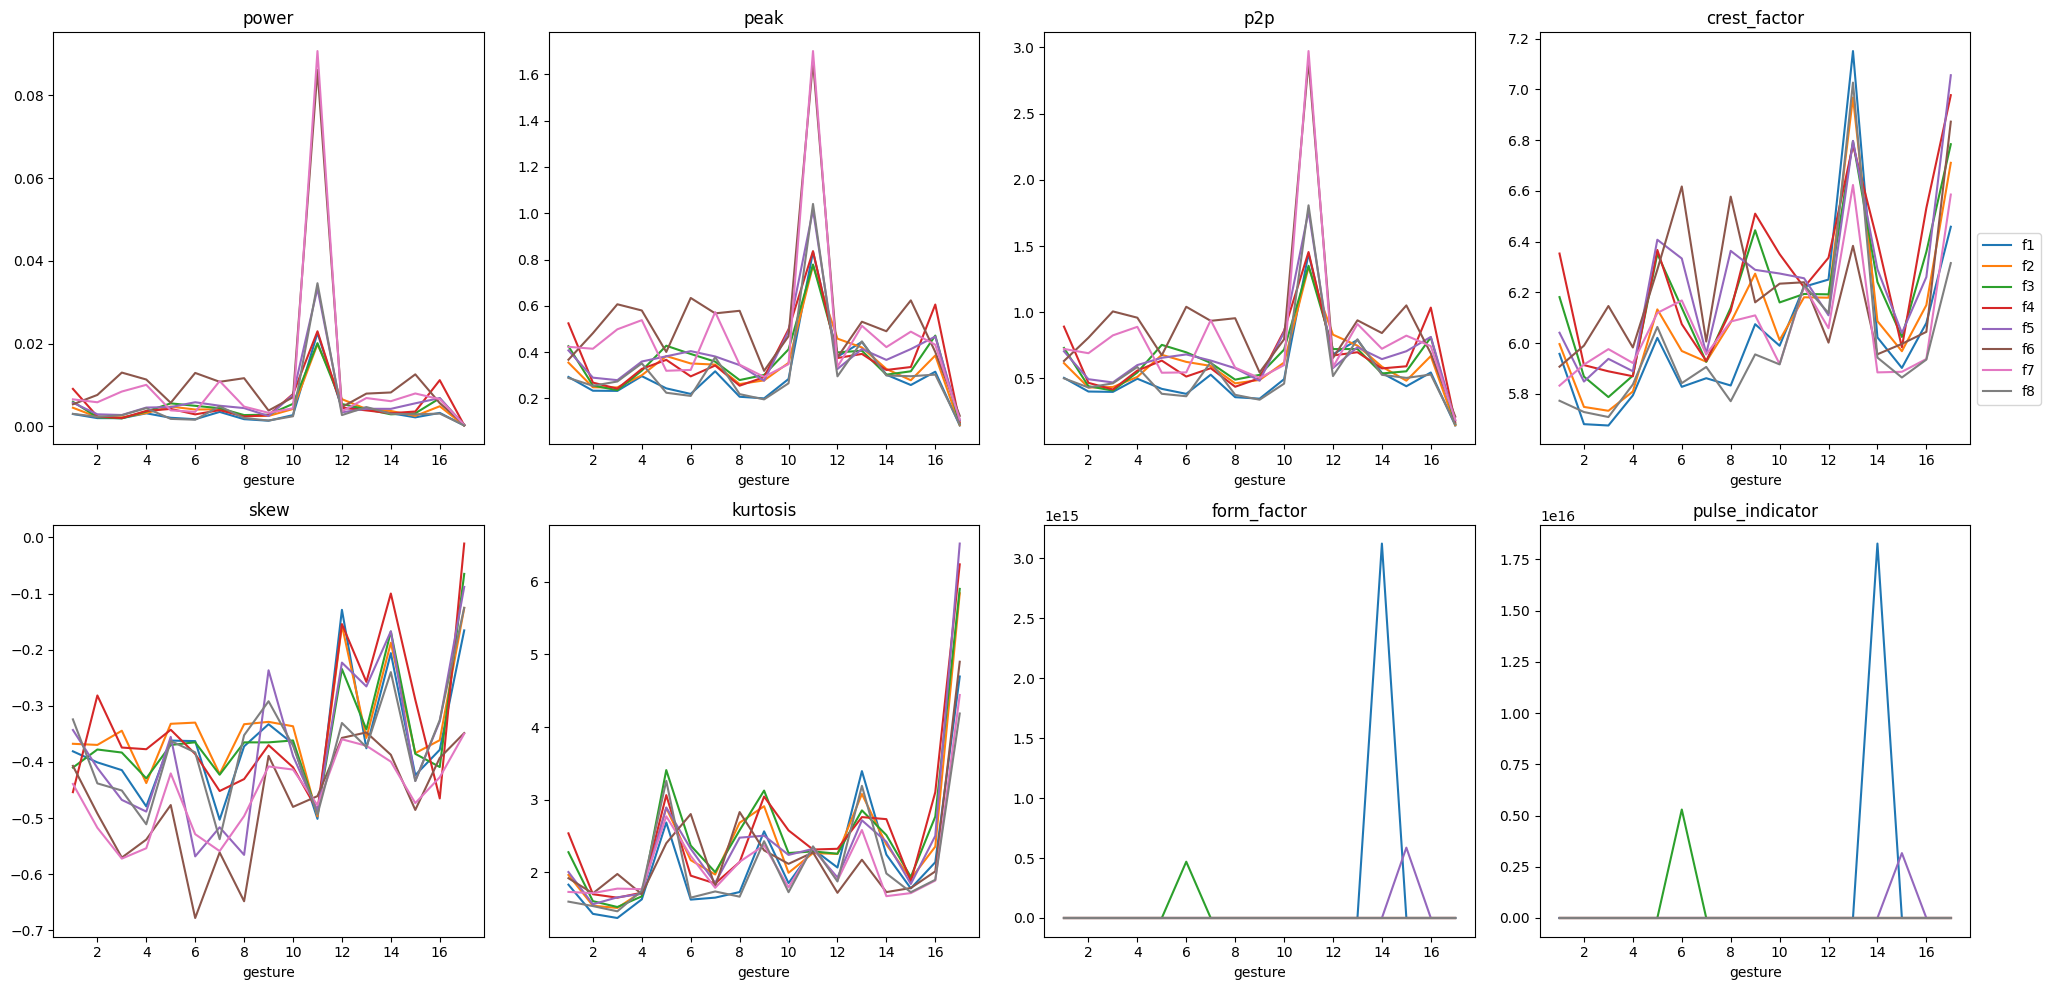

In [18]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session.iloc[:, :8].plot(ax = axes[0][0])
avg_session.iloc[:, 28:36].plot(ax = axes[0][1])
avg_session.iloc[:, 56:64].plot(ax = axes[0][2])
avg_session.iloc[:, 84:92].plot(ax = axes[0][3])
avg_session.iloc[:, 112:120].plot(ax = axes[1][0])
avg_session.iloc[:, 140:148].plot(ax = axes[1][1])
avg_session.iloc[:, 168:176].plot(ax = axes[1][2])
avg_session.iloc[:, 196:204].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring1, loc="center left", bbox_to_anchor=(1, 1.5))

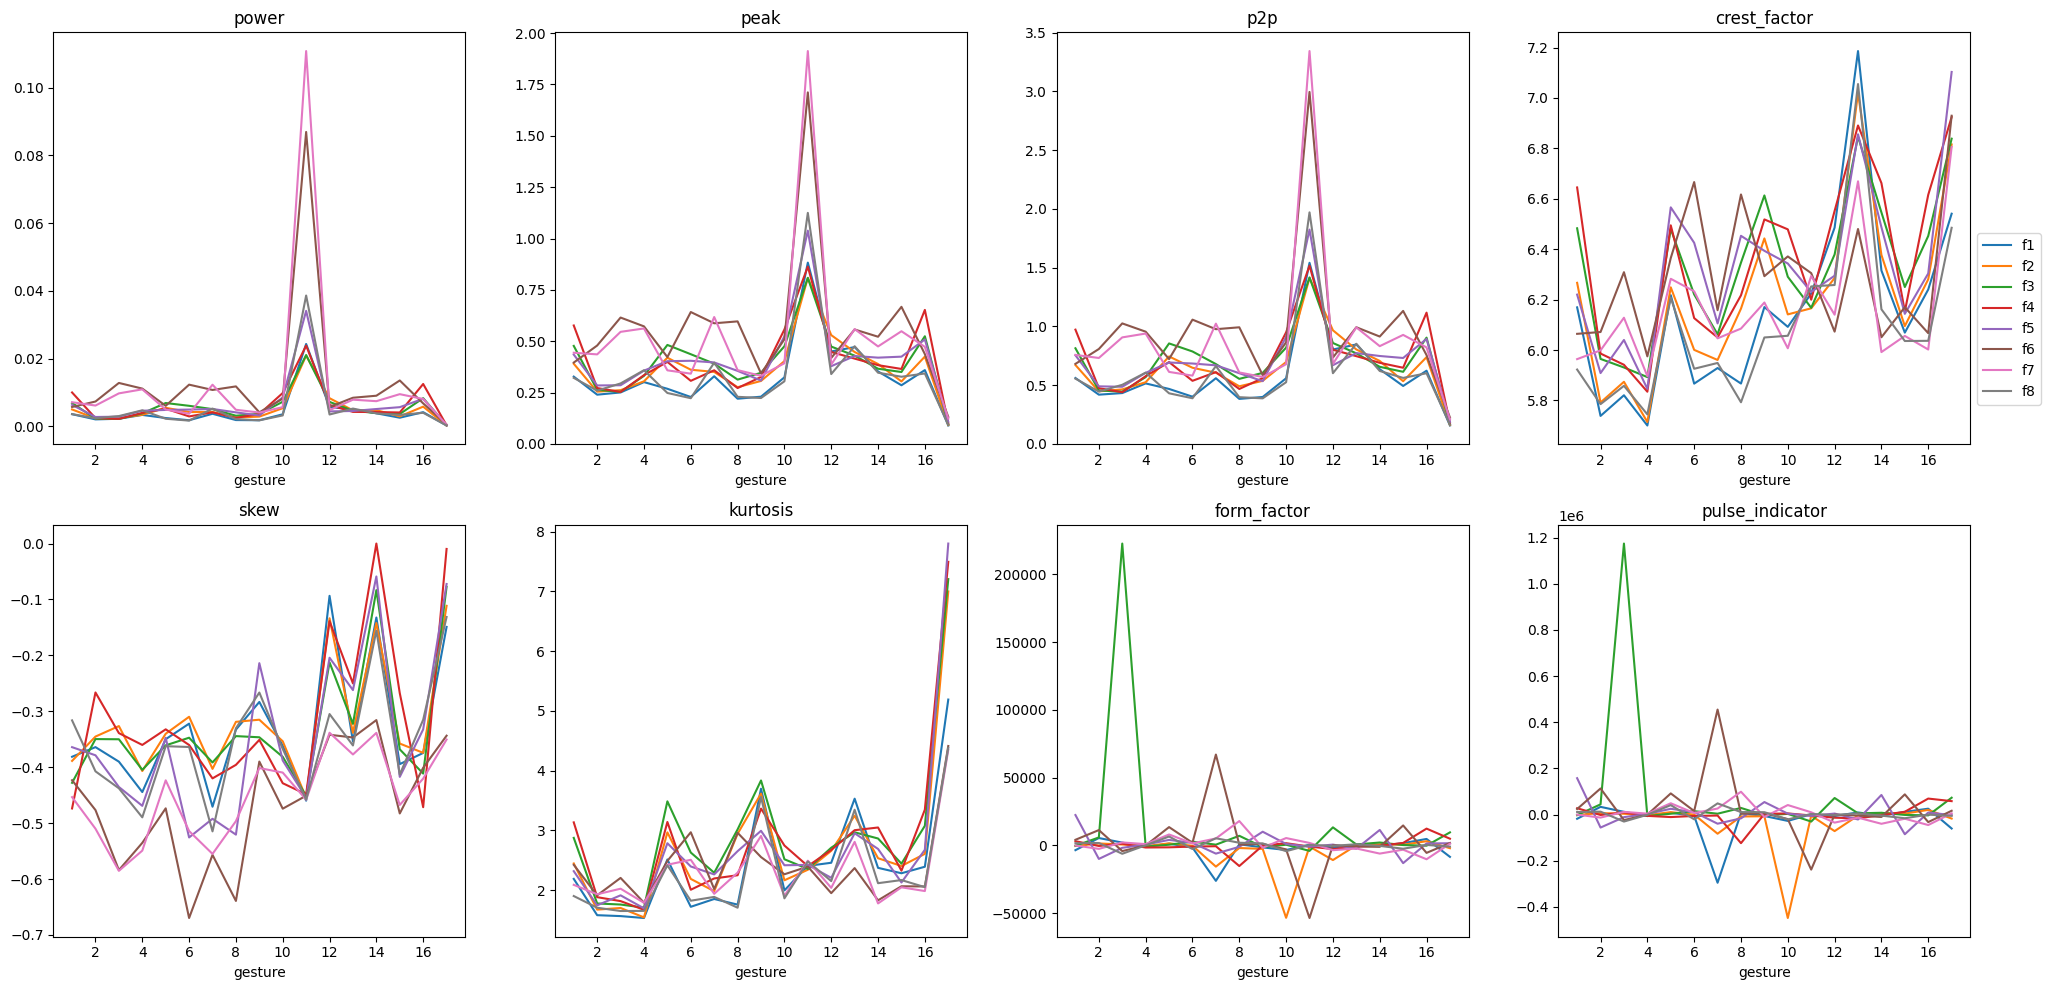

In [19]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session1.iloc[:, :8].plot(ax = axes[0][0])
avg_session1.iloc[:, 28:36].plot(ax = axes[0][1])
avg_session1.iloc[:, 56:64].plot(ax = axes[0][2])
avg_session1.iloc[:, 84:92].plot(ax = axes[0][3])
avg_session1.iloc[:, 112:120].plot(ax = axes[1][0])
avg_session1.iloc[:, 140:148].plot(ax = axes[1][1])
avg_session1.iloc[:, 168:176].plot(ax = axes[1][2])
avg_session1.iloc[:, 196:204].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring1, loc="center left", bbox_to_anchor=(1, 1.5))

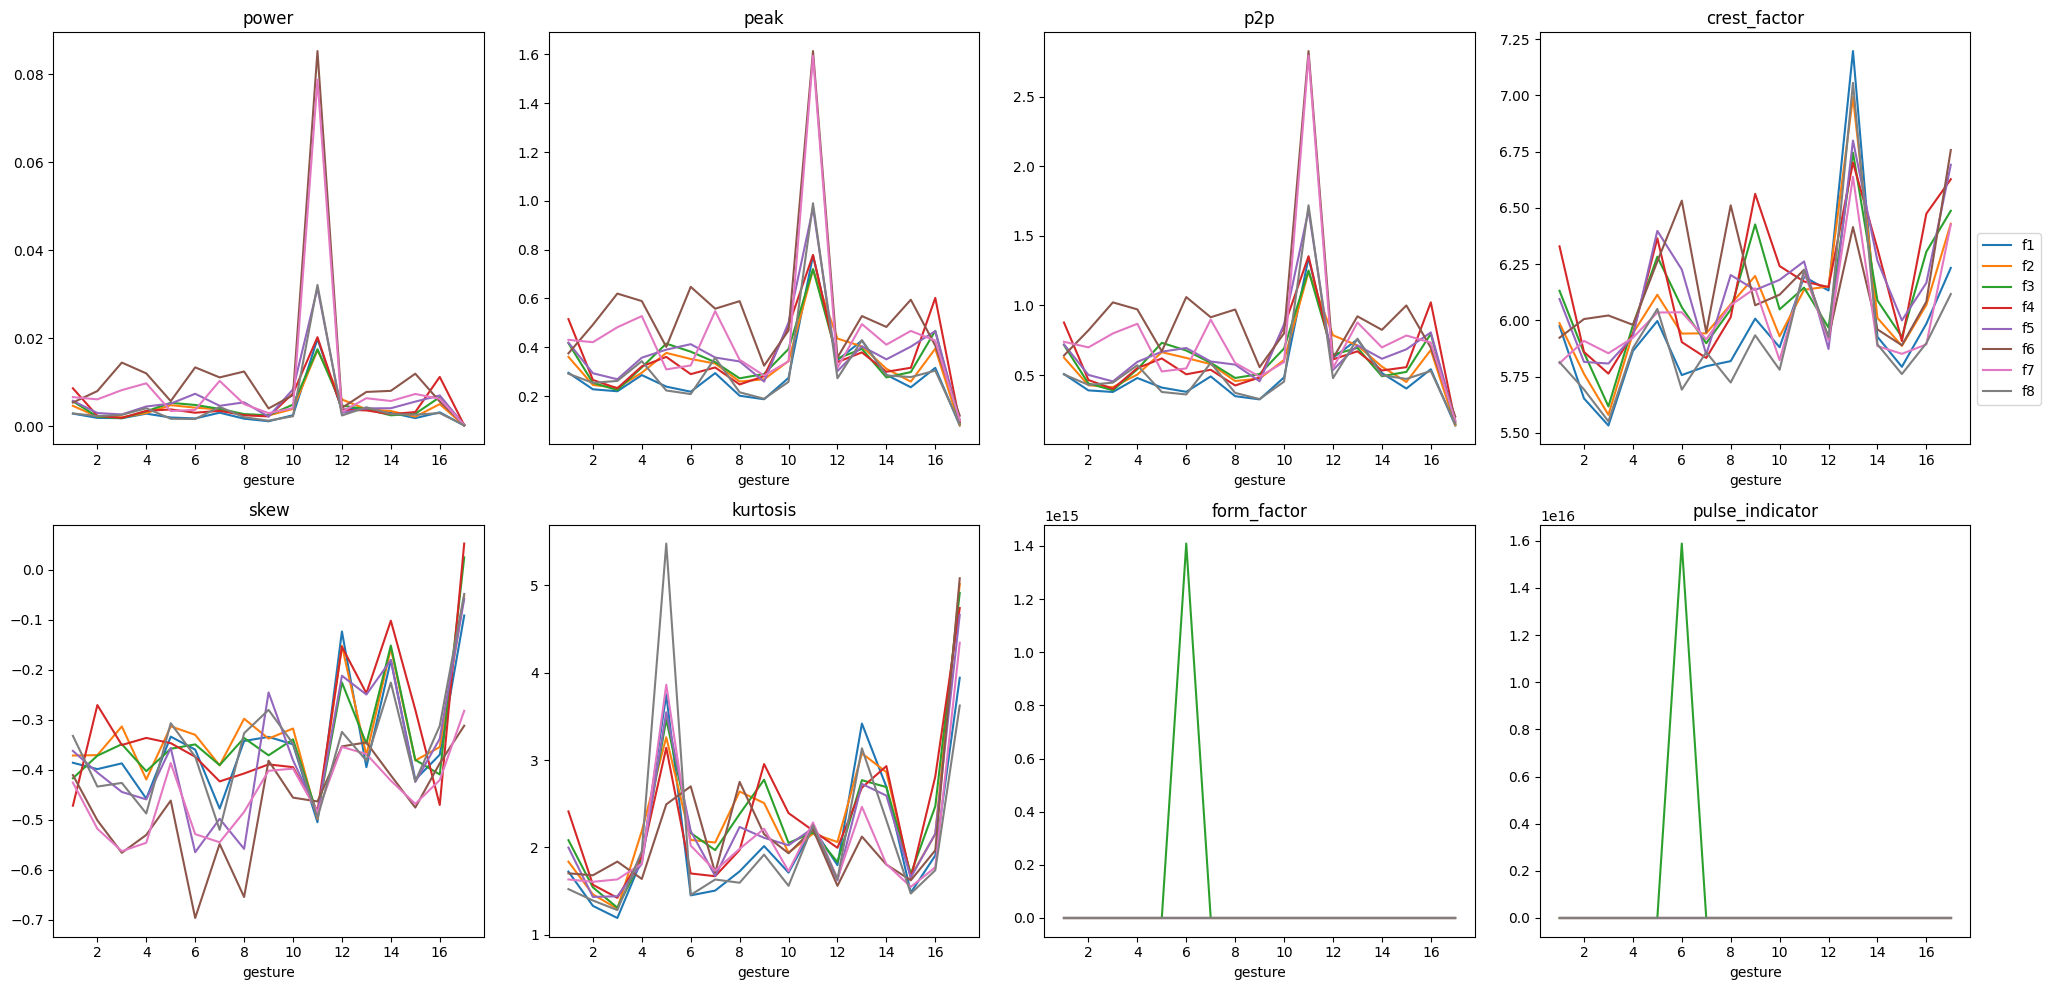

In [20]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session2.iloc[:, :8].plot(ax = axes[0][0])
avg_session2.iloc[:, 28:36].plot(ax = axes[0][1])
avg_session2.iloc[:, 56:64].plot(ax = axes[0][2])
avg_session2.iloc[:, 84:92].plot(ax = axes[0][3])
avg_session2.iloc[:, 112:120].plot(ax = axes[1][0])
avg_session2.iloc[:, 140:148].plot(ax = axes[1][1])
avg_session2.iloc[:, 168:176].plot(ax = axes[1][2])
avg_session2.iloc[:, 196:204].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring1, loc="center left", bbox_to_anchor=(1, 1.5))

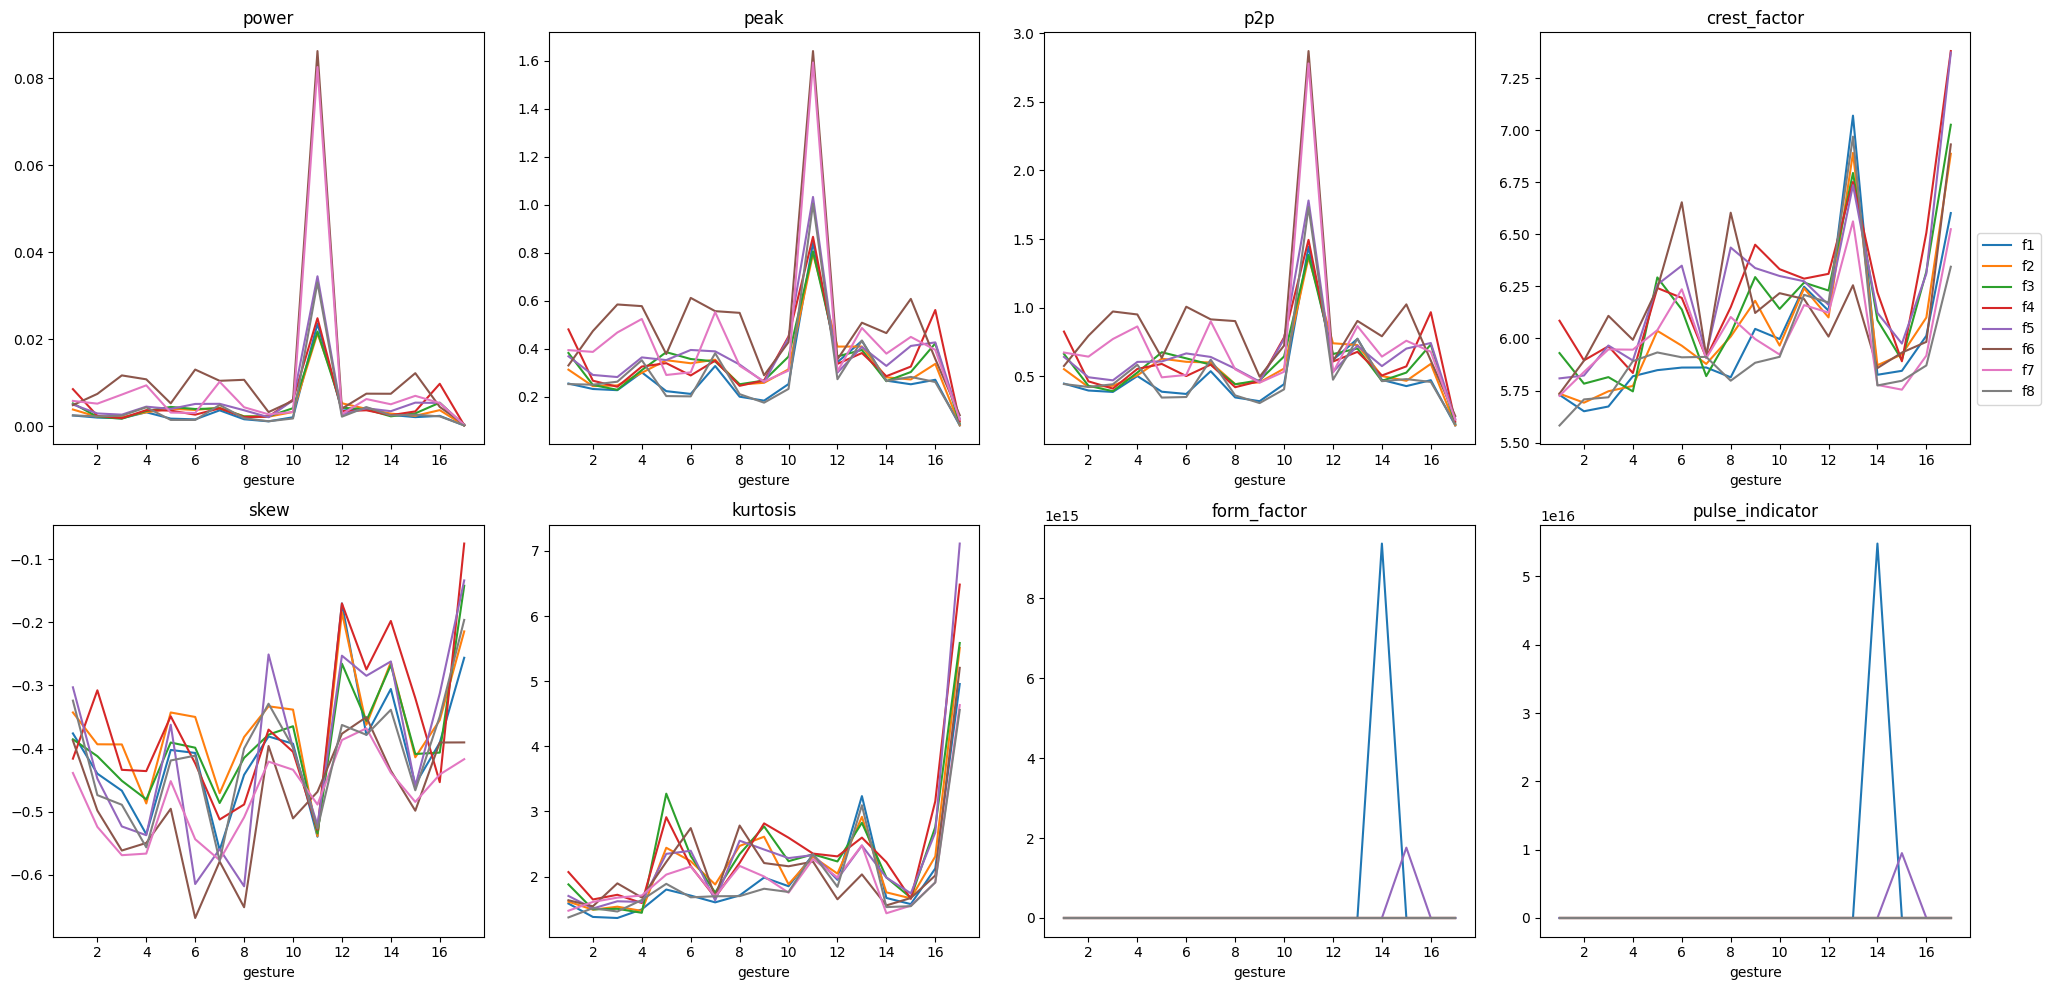

In [21]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session3.iloc[:, :8].plot(ax = axes[0][0])
avg_session3.iloc[:, 28:36].plot(ax = axes[0][1])
avg_session3.iloc[:, 56:64].plot(ax = axes[0][2])
avg_session3.iloc[:, 84:92].plot(ax = axes[0][3])
avg_session3.iloc[:, 112:120].plot(ax = axes[1][0])
avg_session3.iloc[:, 140:148].plot(ax = axes[1][1])
avg_session3.iloc[:, 168:176].plot(ax = axes[1][2])
avg_session3.iloc[:, 196:204].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring1, loc="center left", bbox_to_anchor=(1, 1.5))

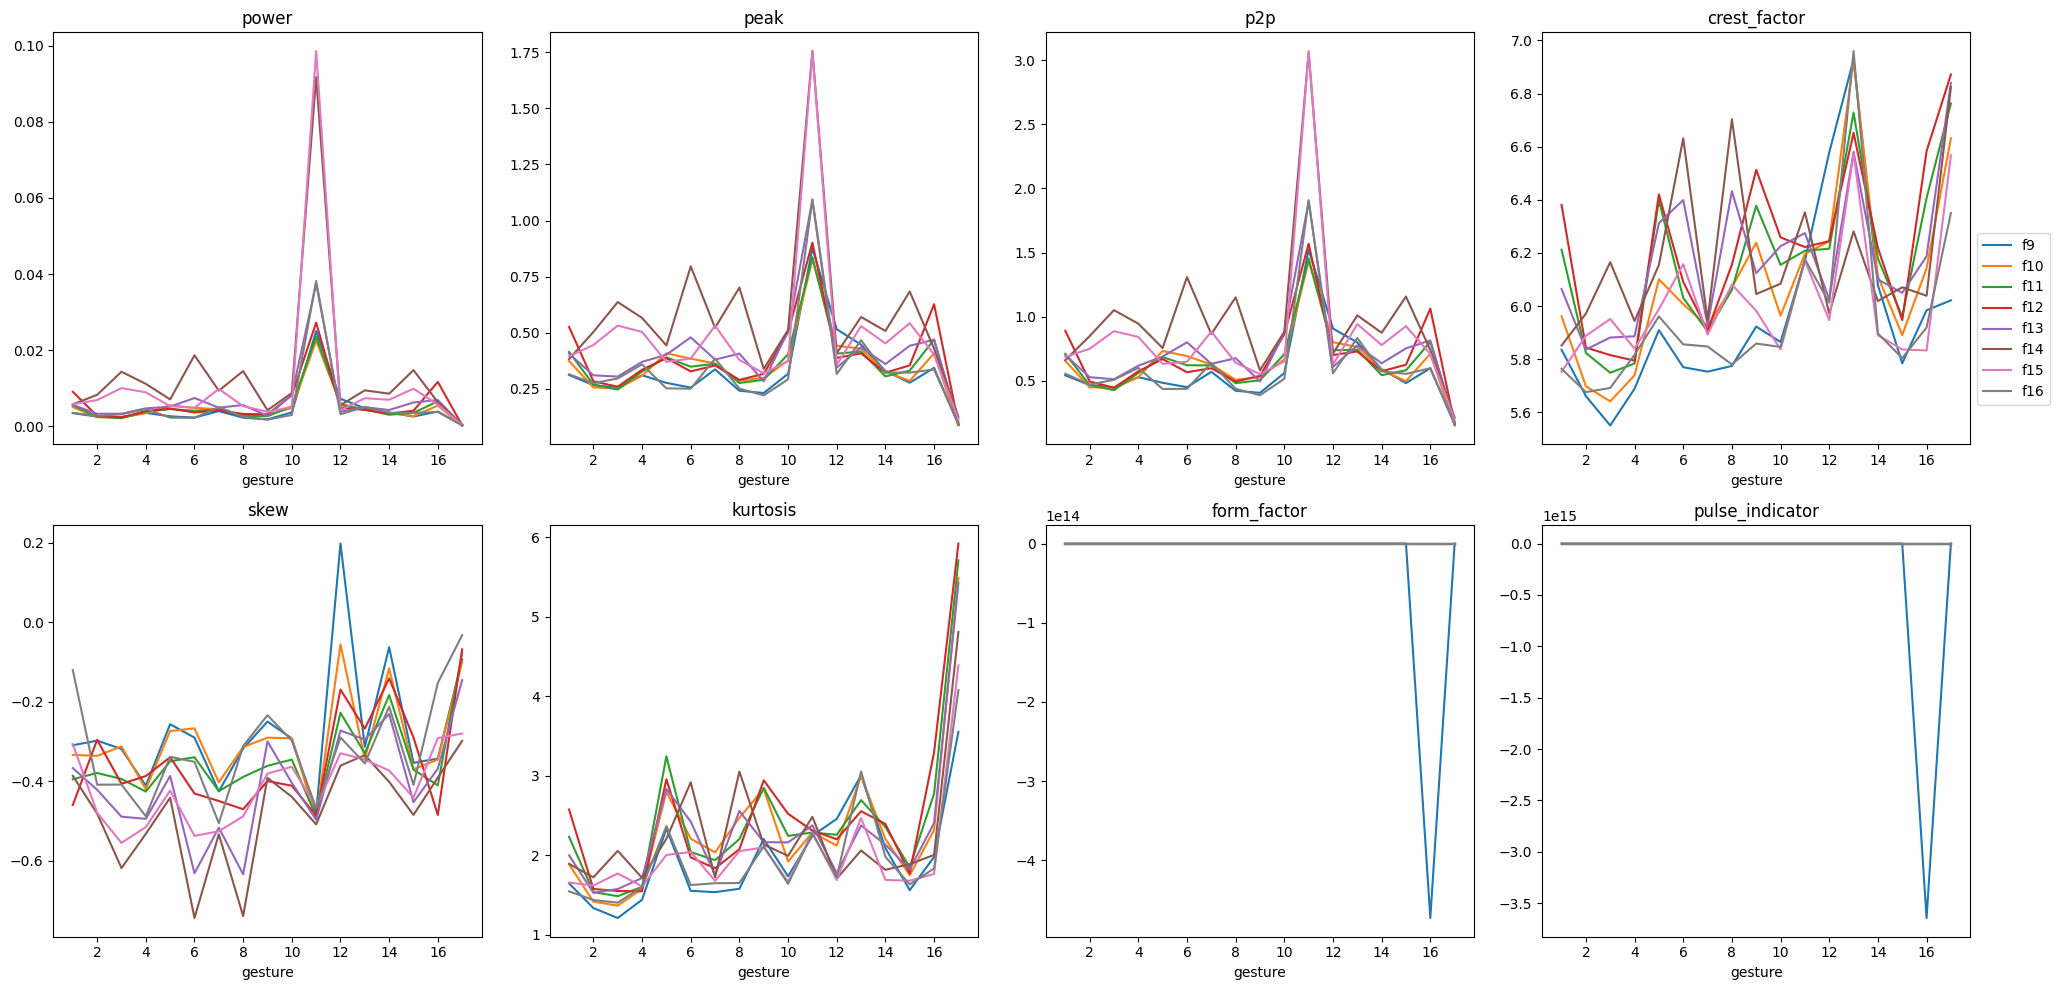

In [22]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session.iloc[:, 8:16].plot(ax = axes[0][0])
avg_session.iloc[:, 36:44].plot(ax = axes[0][1])
avg_session.iloc[:, 64:72].plot(ax = axes[0][2])
avg_session.iloc[:, 92:100].plot(ax = axes[0][3])
avg_session.iloc[:, 120:128].plot(ax = axes[1][0])
avg_session.iloc[:, 148:156].plot(ax = axes[1][1])
avg_session.iloc[:, 176:184].plot(ax = axes[1][2])
avg_session.iloc[:, 204:212].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring2, loc="center left", bbox_to_anchor=(1, 1.5))

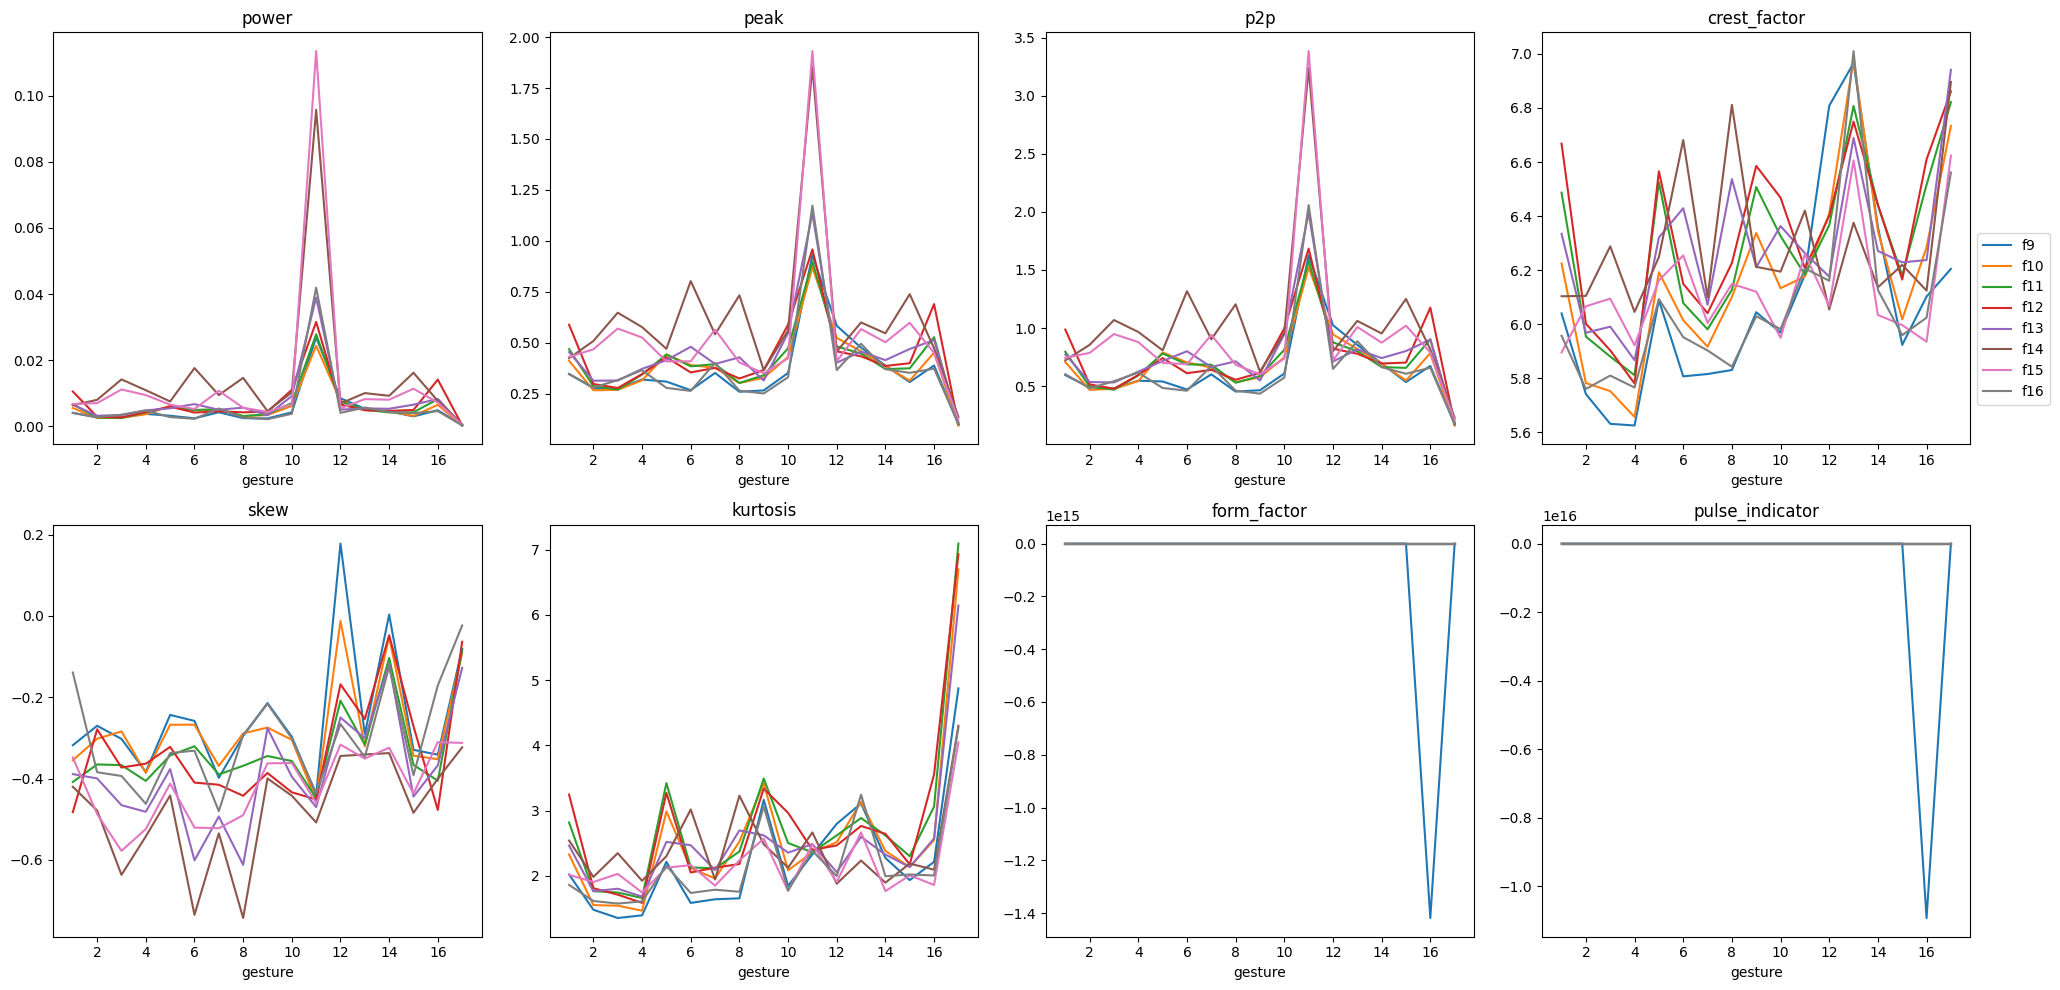

In [23]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session1.iloc[:, 8:16].plot(ax = axes[0][0])
avg_session1.iloc[:, 36:44].plot(ax = axes[0][1])
avg_session1.iloc[:, 64:72].plot(ax = axes[0][2])
avg_session1.iloc[:, 92:100].plot(ax = axes[0][3])
avg_session1.iloc[:, 120:128].plot(ax = axes[1][0])
avg_session1.iloc[:, 148:156].plot(ax = axes[1][1])
avg_session1.iloc[:, 176:184].plot(ax = axes[1][2])
avg_session1.iloc[:, 204:212].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring2, loc="center left", bbox_to_anchor=(1, 1.5))

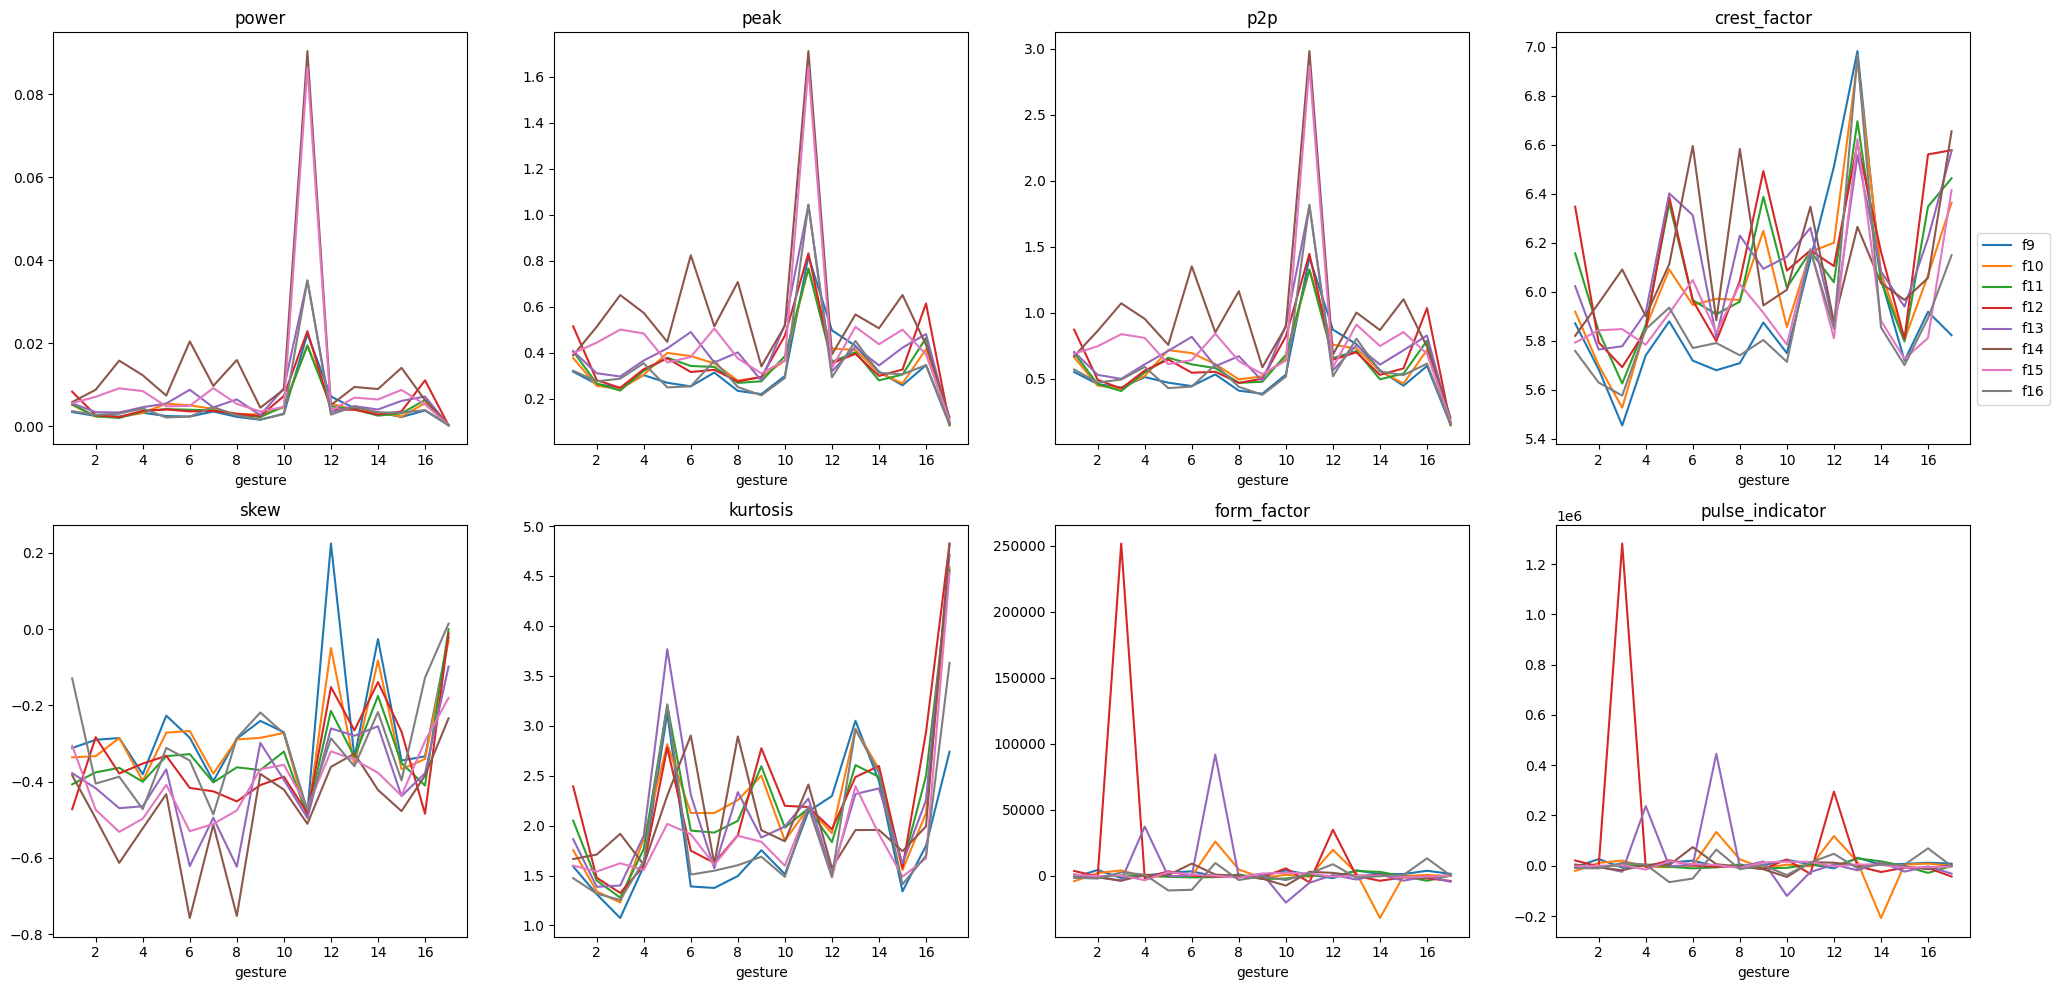

In [24]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session2.iloc[:, 8:16].plot(ax = axes[0][0])
avg_session2.iloc[:, 36:44].plot(ax = axes[0][1])
avg_session2.iloc[:, 64:72].plot(ax = axes[0][2])
avg_session2.iloc[:, 92:100].plot(ax = axes[0][3])
avg_session2.iloc[:, 120:128].plot(ax = axes[1][0])
avg_session2.iloc[:, 148:156].plot(ax = axes[1][1])
avg_session2.iloc[:, 176:184].plot(ax = axes[1][2])
avg_session2.iloc[:, 204:212].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring2, loc="center left", bbox_to_anchor=(1, 1.5))

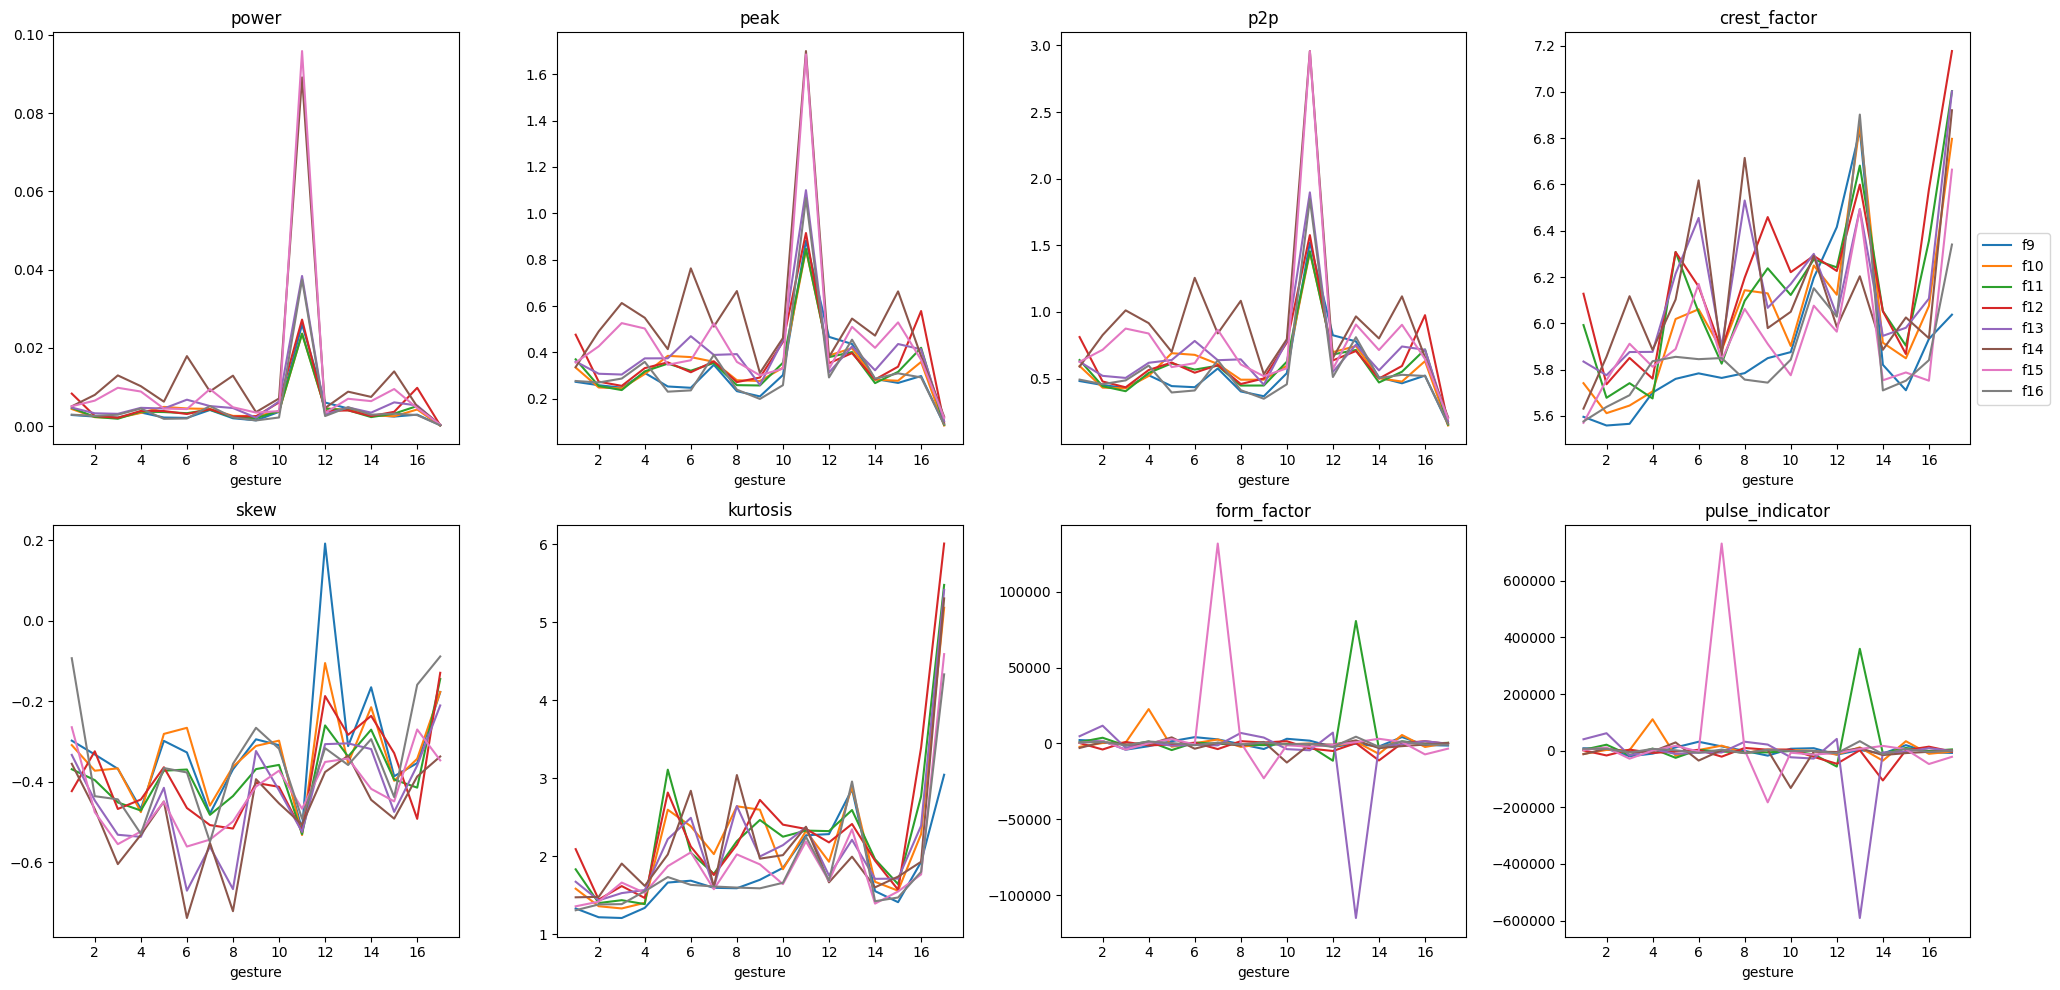

In [25]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session3.iloc[:, 8:16].plot(ax = axes[0][0])
avg_session3.iloc[:, 36:44].plot(ax = axes[0][1])
avg_session3.iloc[:, 64:72].plot(ax = axes[0][2])
avg_session3.iloc[:, 92:100].plot(ax = axes[0][3])
avg_session3.iloc[:, 120:128].plot(ax = axes[1][0])
avg_session3.iloc[:, 148:156].plot(ax = axes[1][1])
avg_session3.iloc[:, 176:184].plot(ax = axes[1][2])
avg_session3.iloc[:, 204:212].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_forearm_ring2, loc="center left", bbox_to_anchor=(1, 1.5))

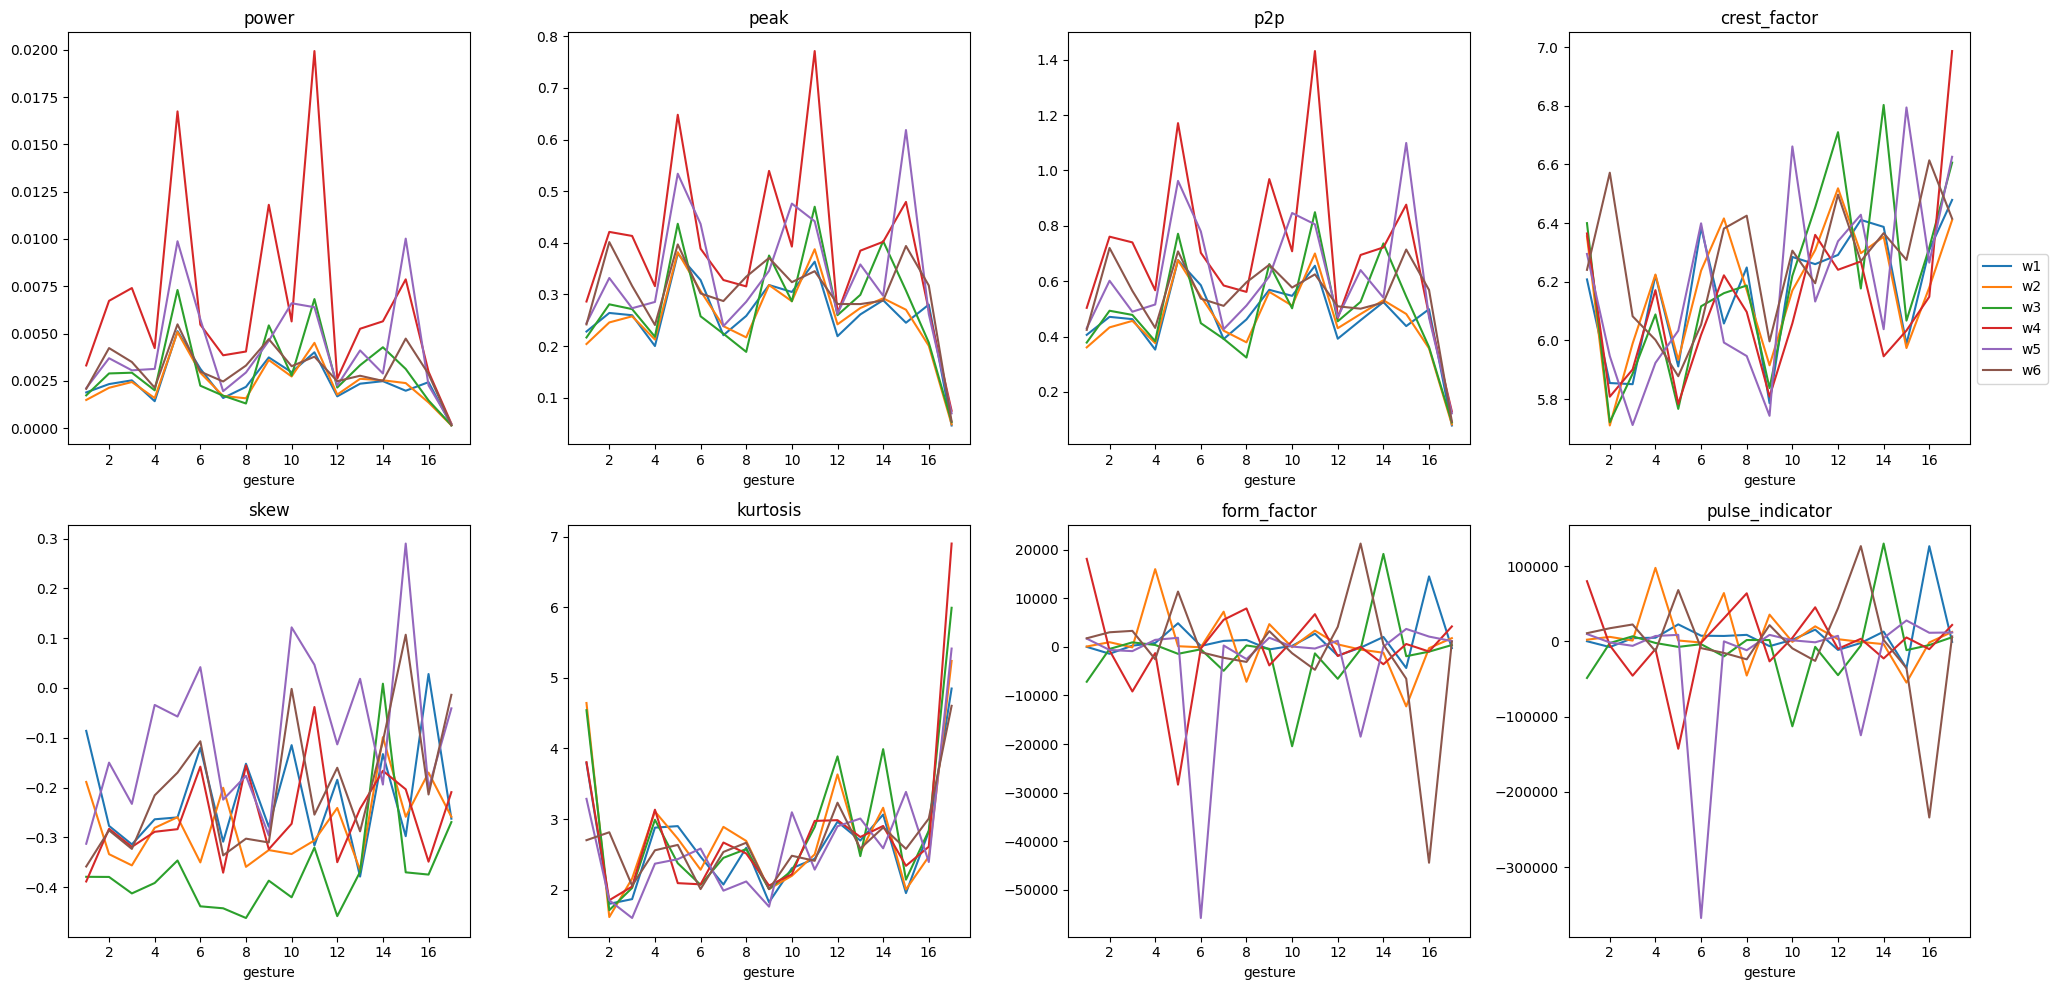

In [26]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session.iloc[:, 16:22].plot(ax = axes[0][0])
avg_session.iloc[:, 44:50].plot(ax = axes[0][1])
avg_session.iloc[:, 72:78].plot(ax = axes[0][2])
avg_session.iloc[:, 100:106].plot(ax = axes[0][3])
avg_session.iloc[:, 128:134].plot(ax = axes[1][0])
avg_session.iloc[:, 156:162].plot(ax = axes[1][1])
avg_session.iloc[:, 184:190].plot(ax = axes[1][2])
avg_session.iloc[:, 212:218].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring3, loc="center left", bbox_to_anchor=(1, 1.5))

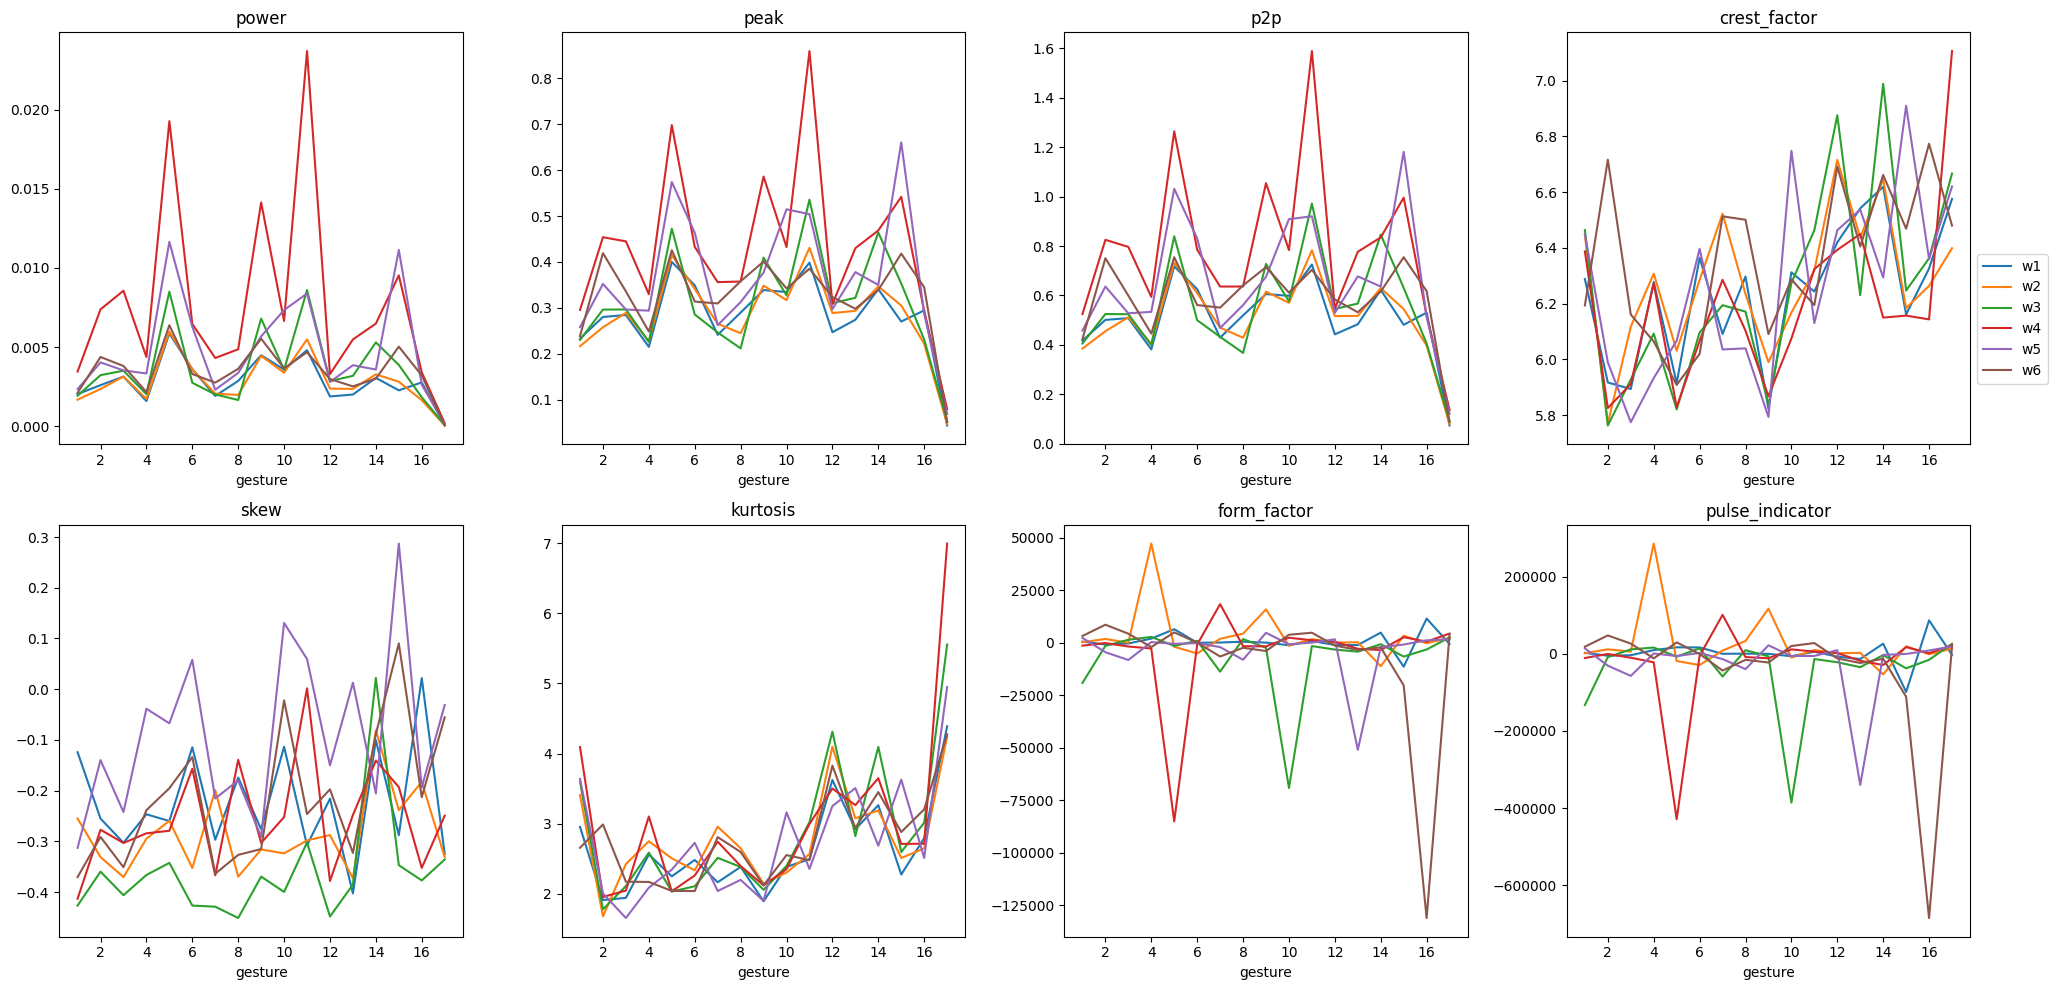

In [27]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session1.iloc[:, 16:22].plot(ax = axes[0][0])
avg_session1.iloc[:, 44:50].plot(ax = axes[0][1])
avg_session1.iloc[:, 72:78].plot(ax = axes[0][2])
avg_session1.iloc[:, 100:106].plot(ax = axes[0][3])
avg_session1.iloc[:, 128:134].plot(ax = axes[1][0])
avg_session1.iloc[:, 156:162].plot(ax = axes[1][1])
avg_session1.iloc[:, 184:190].plot(ax = axes[1][2])
avg_session1.iloc[:, 212:218].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring3, loc="center left", bbox_to_anchor=(1, 1.5))

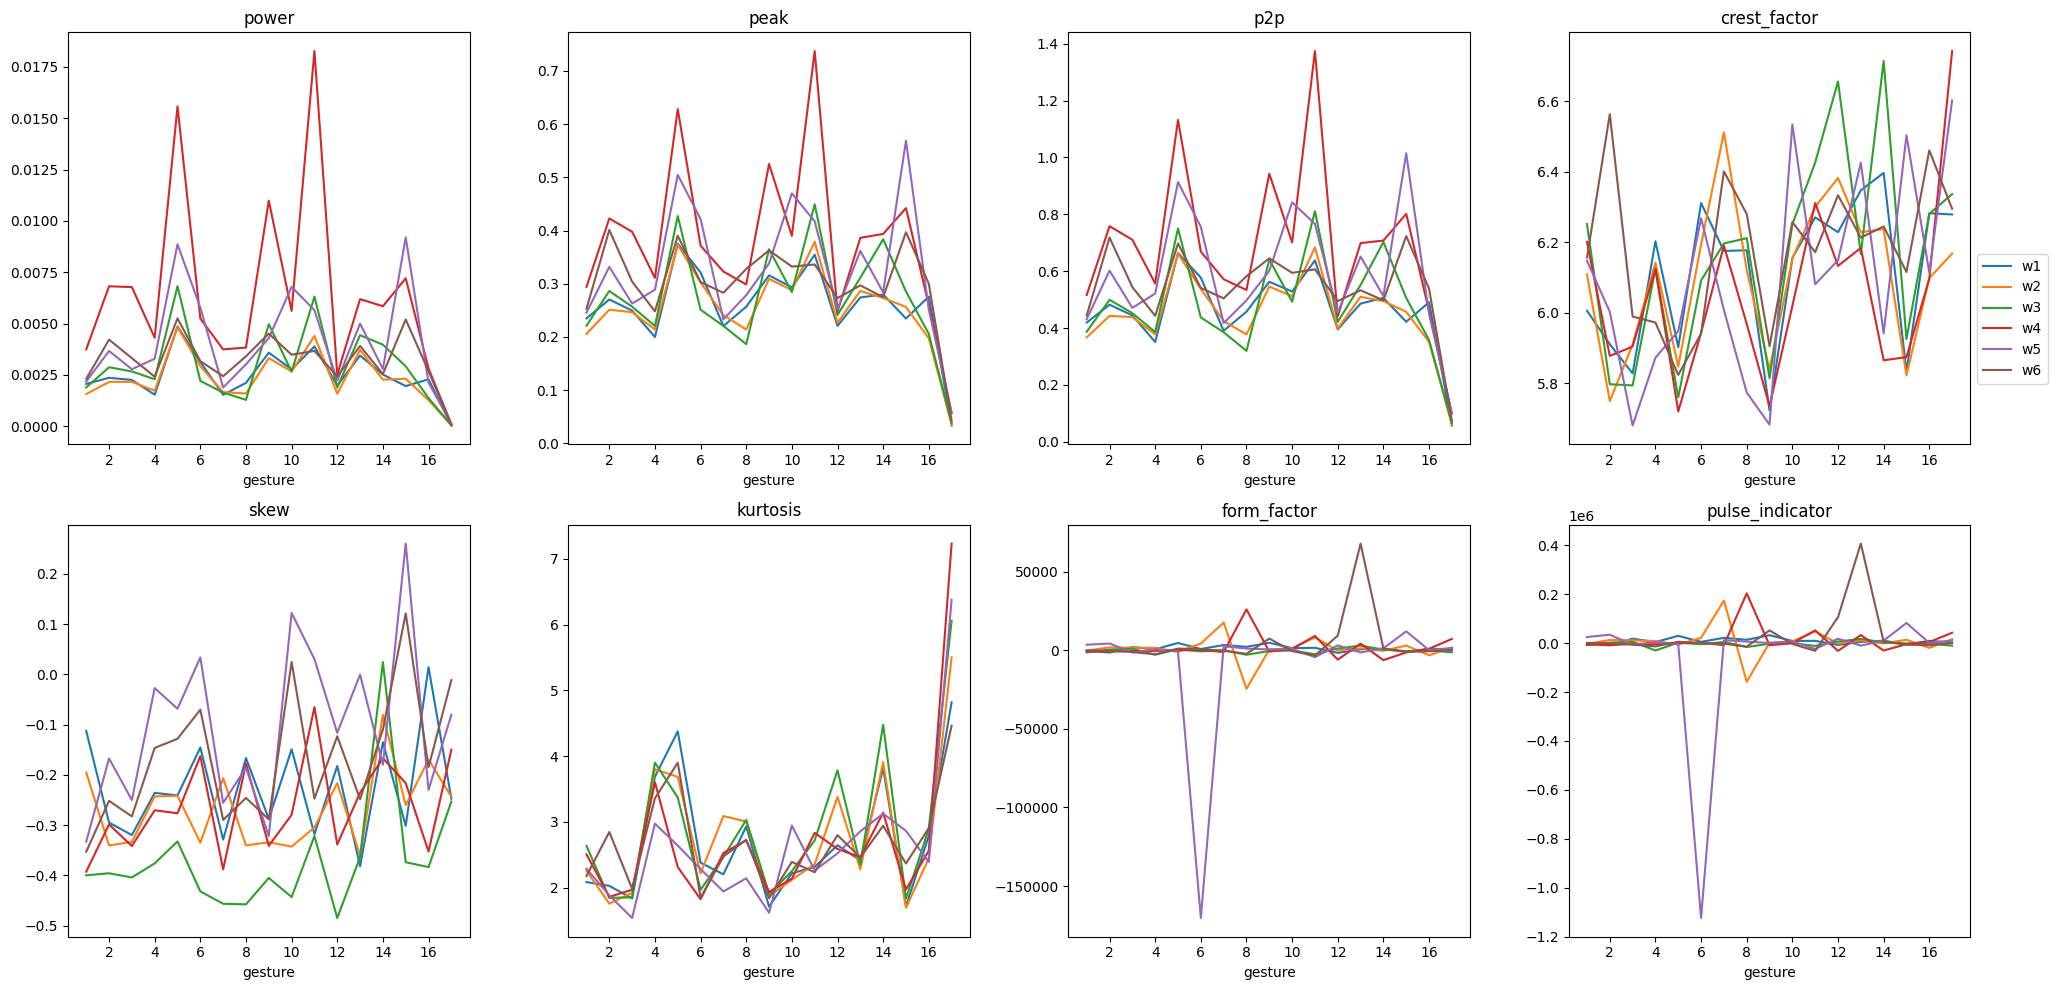

In [28]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session2.iloc[:, 16:22].plot(ax = axes[0][0])
avg_session2.iloc[:, 44:50].plot(ax = axes[0][1])
avg_session2.iloc[:, 72:78].plot(ax = axes[0][2])
avg_session2.iloc[:, 100:106].plot(ax = axes[0][3])
avg_session2.iloc[:, 128:134].plot(ax = axes[1][0])
avg_session2.iloc[:, 156:162].plot(ax = axes[1][1])
avg_session2.iloc[:, 184:190].plot(ax = axes[1][2])
avg_session2.iloc[:, 212:218].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring3, loc="center left", bbox_to_anchor=(1, 1.5))

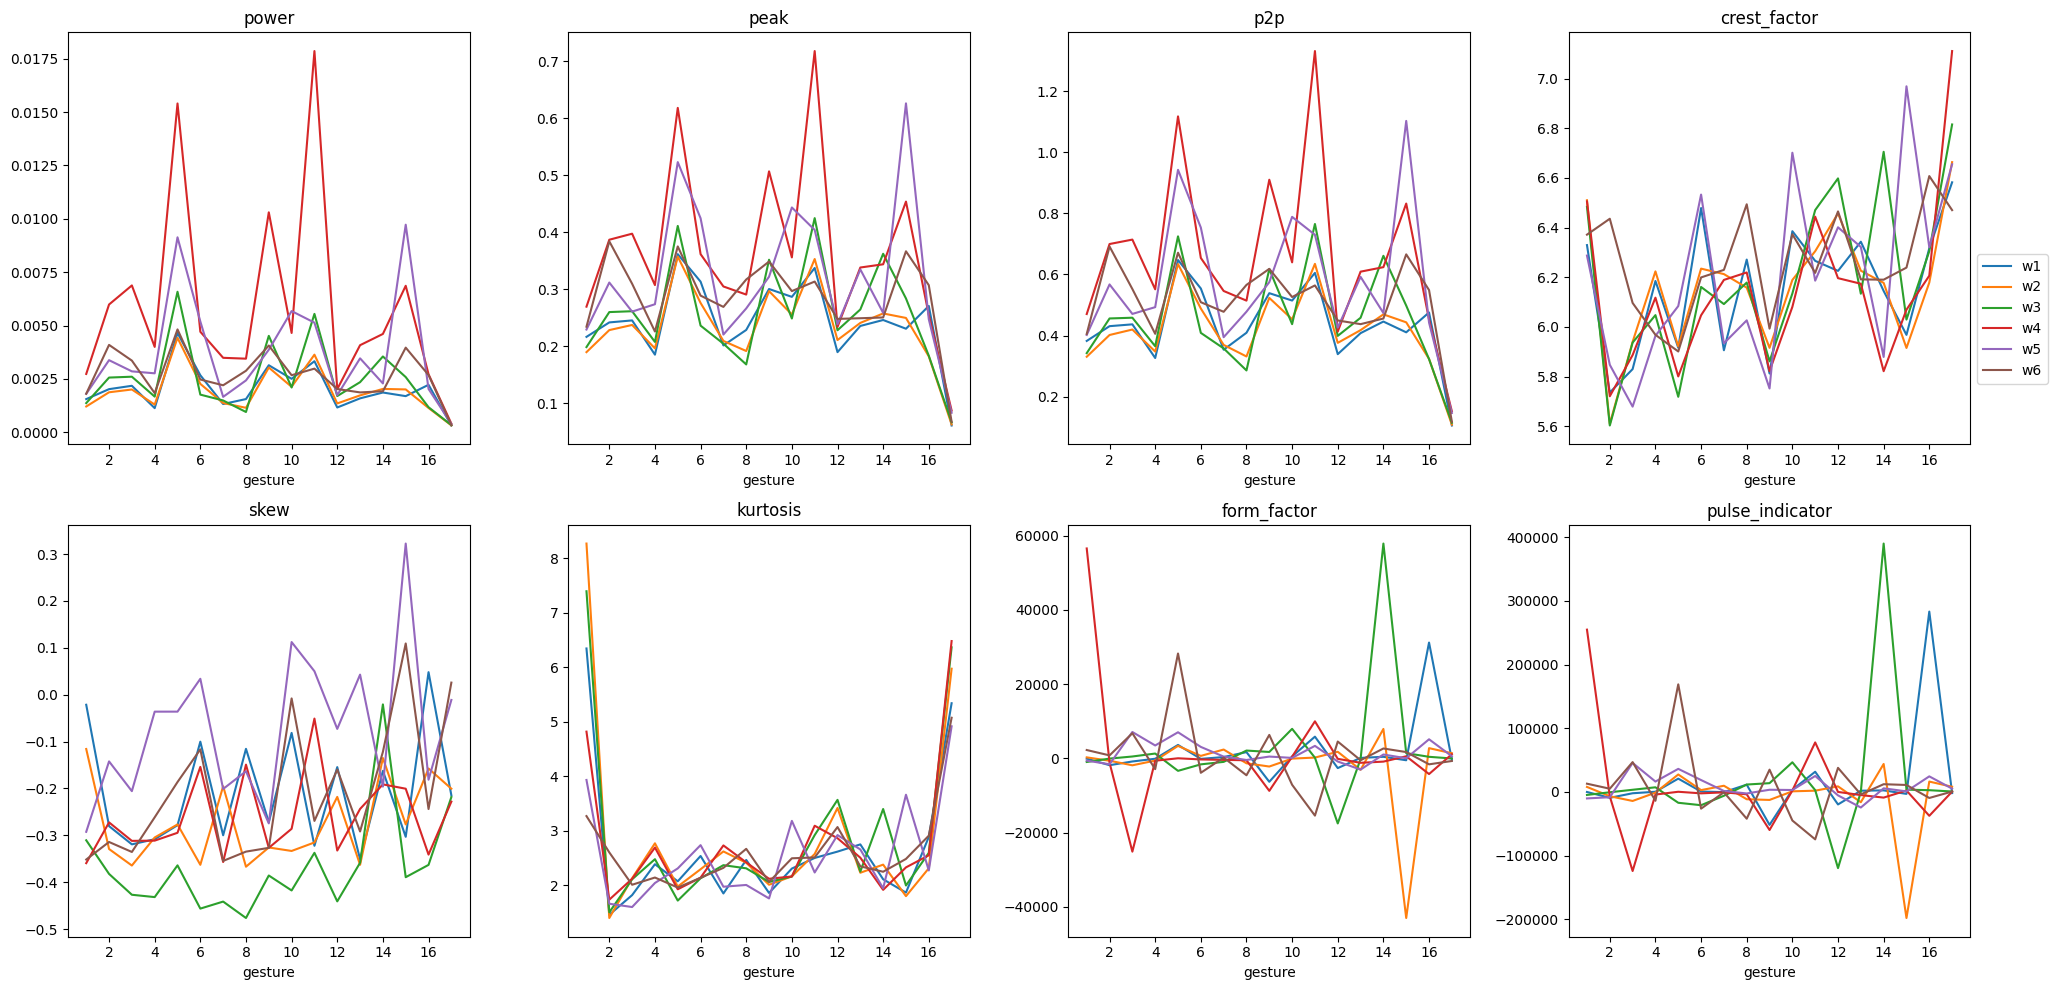

In [29]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session3.iloc[:, 16:22].plot(ax = axes[0][0])
avg_session3.iloc[:, 44:50].plot(ax = axes[0][1])
avg_session3.iloc[:, 72:78].plot(ax = axes[0][2])
avg_session3.iloc[:, 100:106].plot(ax = axes[0][3])
avg_session3.iloc[:, 128:134].plot(ax = axes[1][0])
avg_session3.iloc[:, 156:162].plot(ax = axes[1][1])
avg_session3.iloc[:, 184:190].plot(ax = axes[1][2])
avg_session3.iloc[:, 212:218].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring3, loc="center left", bbox_to_anchor=(1, 1.5))

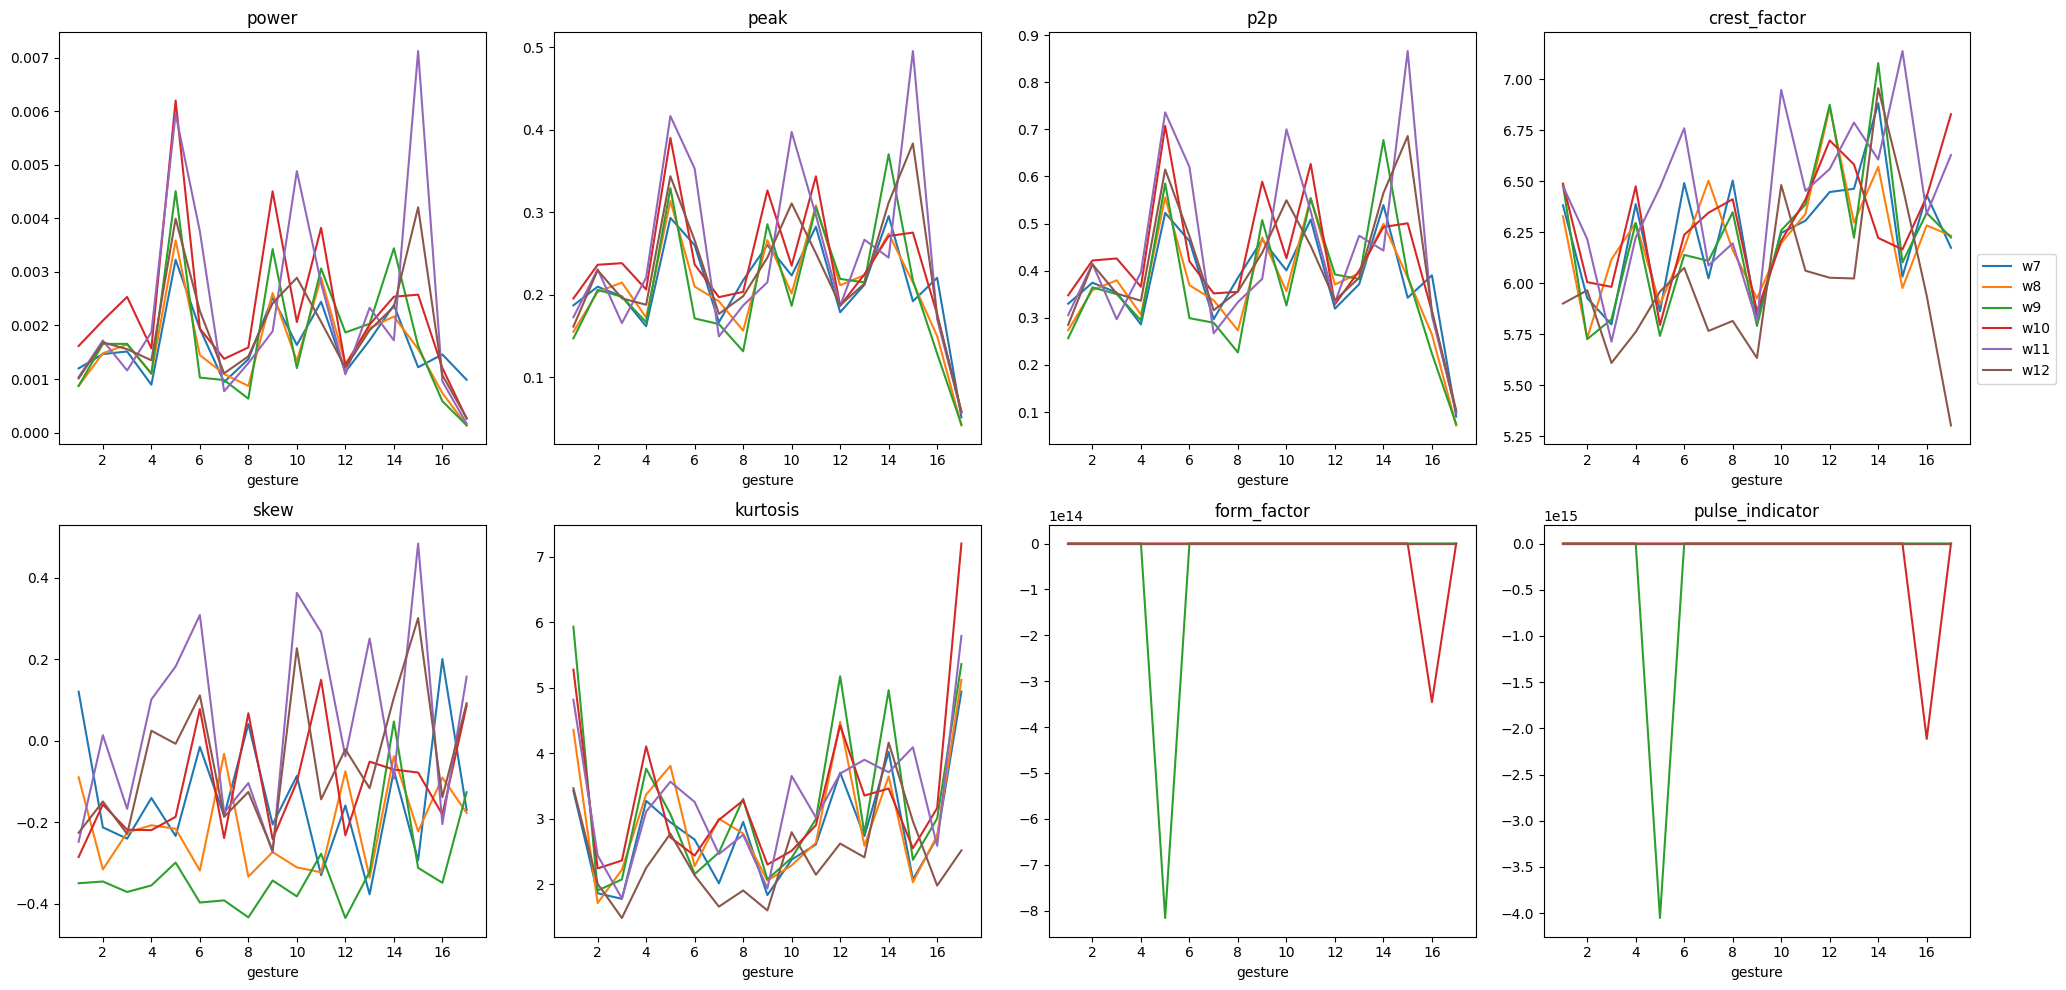

In [30]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session.iloc[:, 22:28].plot(ax = axes[0][0])
avg_session.iloc[:, 50:56].plot(ax = axes[0][1])
avg_session.iloc[:, 78:84].plot(ax = axes[0][2])
avg_session.iloc[:, 106:112].plot(ax = axes[0][3])
avg_session.iloc[:, 134:140].plot(ax = axes[1][0])
avg_session.iloc[:, 162:168].plot(ax = axes[1][1])
avg_session.iloc[:, 190:196].plot(ax = axes[1][2])
avg_session.iloc[:, 218:].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring4, loc="center left", bbox_to_anchor=(1, 1.5))

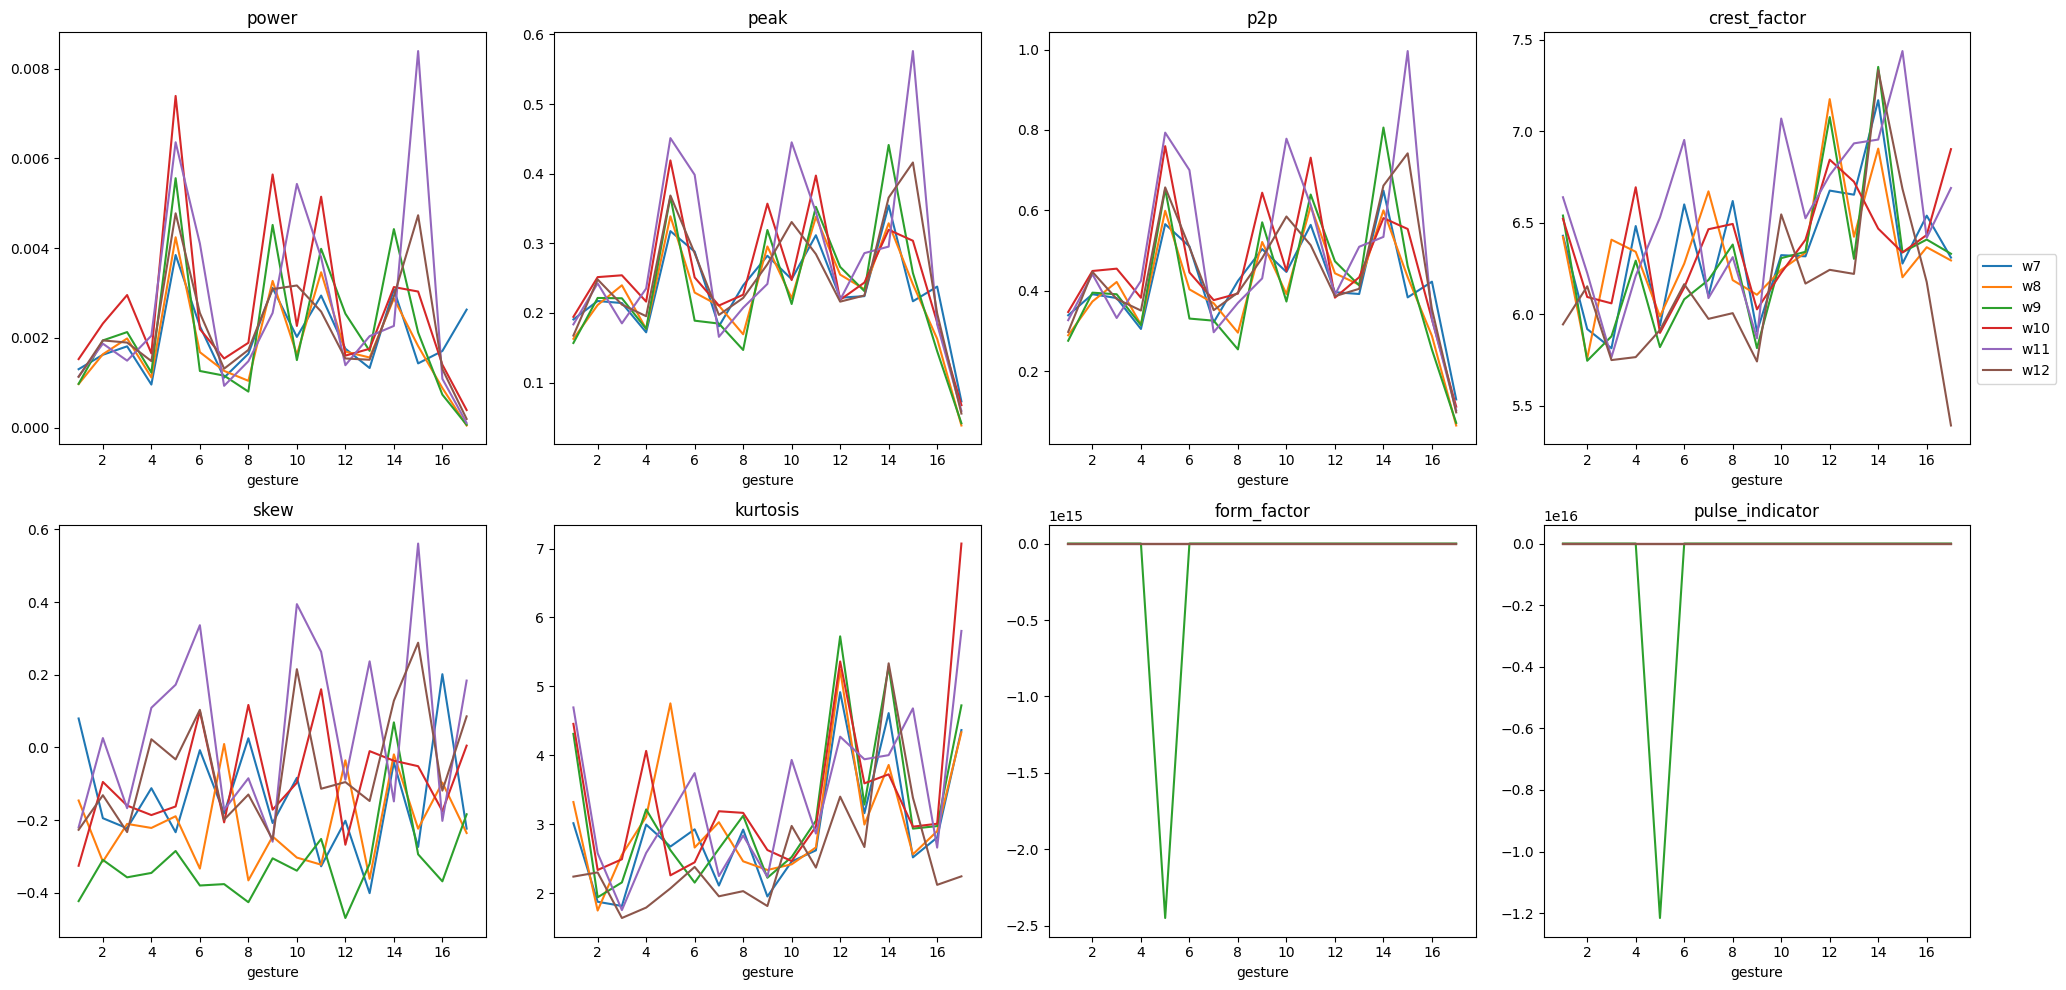

In [31]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session1.iloc[:, 22:28].plot(ax = axes[0][0])
avg_session1.iloc[:, 50:56].plot(ax = axes[0][1])
avg_session1.iloc[:, 78:84].plot(ax = axes[0][2])
avg_session1.iloc[:, 106:112].plot(ax = axes[0][3])
avg_session1.iloc[:, 134:140].plot(ax = axes[1][0])
avg_session1.iloc[:, 162:168].plot(ax = axes[1][1])
avg_session1.iloc[:, 190:196].plot(ax = axes[1][2])
avg_session1.iloc[:, 218:].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring4, loc="center left", bbox_to_anchor=(1, 1.5))

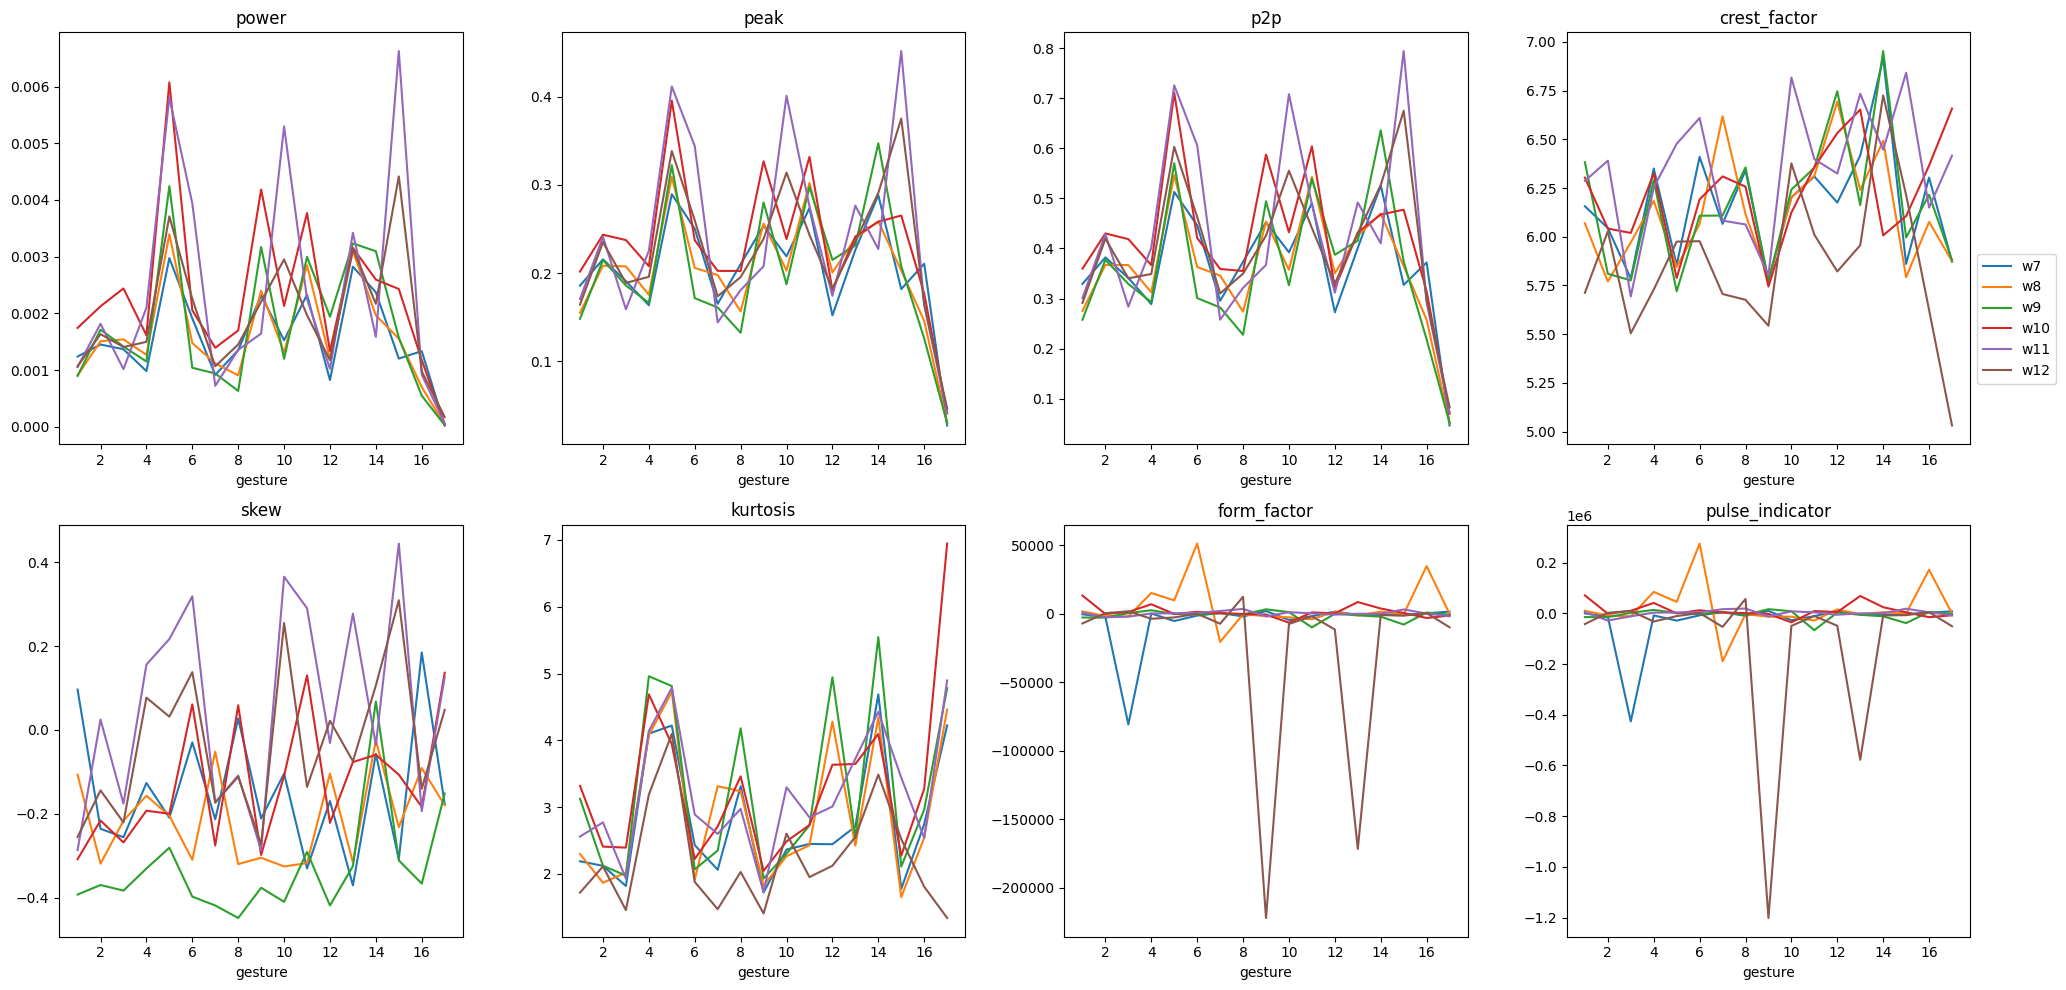

In [32]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session2.iloc[:, 22:28].plot(ax = axes[0][0])
avg_session2.iloc[:, 50:56].plot(ax = axes[0][1])
avg_session2.iloc[:, 78:84].plot(ax = axes[0][2])
avg_session2.iloc[:, 106:112].plot(ax = axes[0][3])
avg_session2.iloc[:, 134:140].plot(ax = axes[1][0])
avg_session2.iloc[:, 162:168].plot(ax = axes[1][1])
avg_session2.iloc[:, 190:196].plot(ax = axes[1][2])
avg_session2.iloc[:, 218:].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring4, loc="center left", bbox_to_anchor=(1, 1.5))

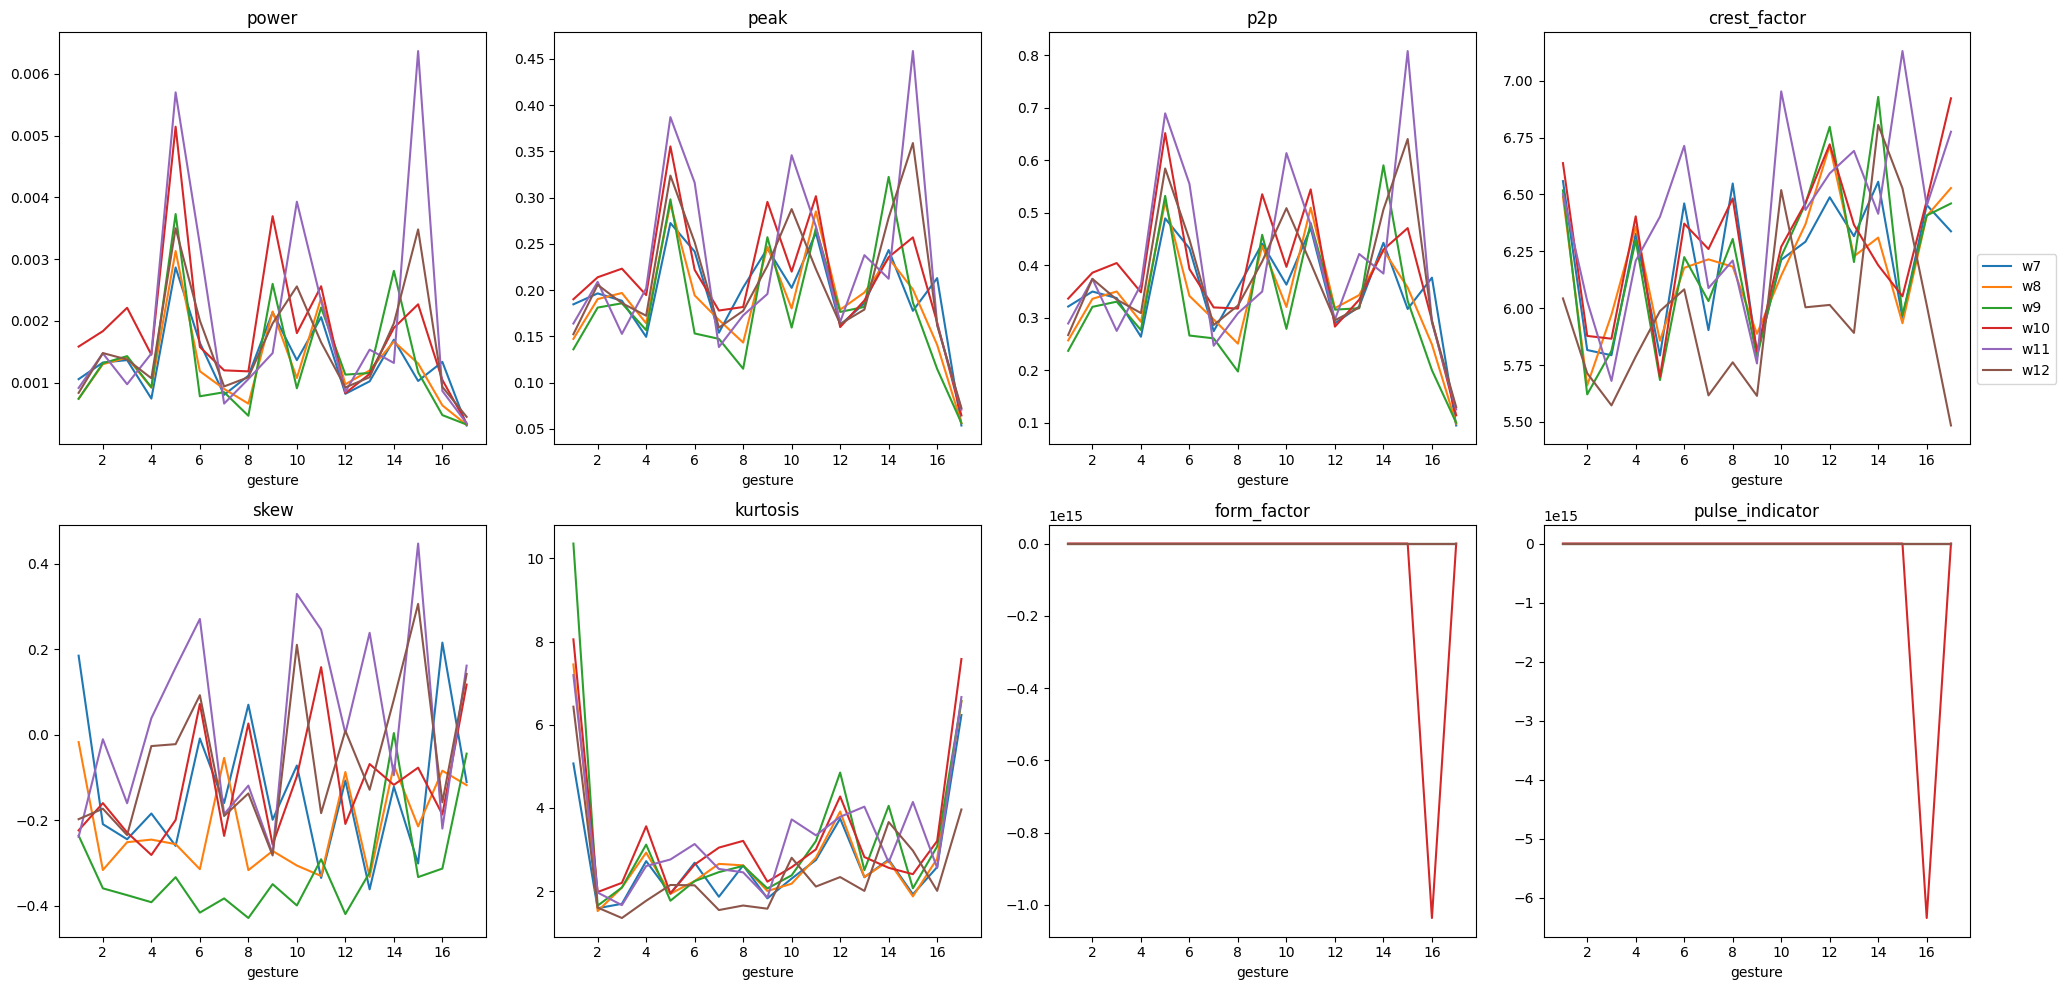

In [33]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
avg_session3.iloc[:, 22:28].plot(ax = axes[0][0])
avg_session3.iloc[:, 50:56].plot(ax = axes[0][1])
avg_session3.iloc[:, 78:84].plot(ax = axes[0][2])
avg_session3.iloc[:, 106:112].plot(ax = axes[0][3])
avg_session3.iloc[:, 134:140].plot(ax = axes[1][0])
avg_session3.iloc[:, 162:168].plot(ax = axes[1][1])
avg_session3.iloc[:, 190:196].plot(ax = axes[1][2])
avg_session3.iloc[:, 218:].plot(ax = axes[1][3])

axes[0][0].title.set_text('power')
axes[0][1].title.set_text('peak')
axes[0][2].title.set_text('p2p')
axes[0][3].title.set_text('crest_factor')
axes[1][0].title.set_text('skew')
axes[1][1].title.set_text('kurtosis')
axes[1][2].title.set_text('form_factor')
axes[1][3].title.set_text('pulse_indicator')

axes[0][0].get_legend().set_visible(False)
axes[0][1].get_legend().set_visible(False)
axes[0][2].get_legend().set_visible(False)
axes[0][3].get_legend().set_visible(False)
axes[1][0].get_legend().set_visible(False)
axes[1][1].get_legend().set_visible(False)
axes[1][2].get_legend().set_visible(False)
axes[1][3].get_legend().set_visible(False)

fig.tight_layout()
plt.legend(labels = mylabels_wrist_ring4, loc="center left", bbox_to_anchor=(1, 1.5))